In [1]:
# Imports
%run supportvectors-common.ipynb

plot_style = {
    # For latex-quality, i.e., publication quality legends and labels on graphs.
    # Warning: you must have installed LaTeX on your system. Else set it to False.
    "text.usetex": True, 
    
    # configure fonts
    "font.size":12,             # default font size
    "font.family":'serif',
    "legend.fontsize": 10,
    "axes.labelsize": 12,
    "axes.titlesize":14,
    "xtick.labelsize" : 10,
    "ytick.labelsize" : 10,
    
    # configure figure
    "figure.dpi": 144,
    "figure.figsize":'10,5',
    "figure.titlesize":14
}

plt.rcParams.update(plot_style)



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



# Wisconsin Breast Cancer Dataset


This dataset describes the 10 real valued features for each cell nucleus (observation). The attributes are:

1.  radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

The target is to classify malignant and benign tumours. 

## Exploratory data analysis

We will follow our well-trodden path of systematically load the data, explore and visualize it.

In [2]:
data = pd.read_csv ("https://raw.githubusercontent.com/supportvectors/ml-100/master/wisconsin-diagnostic-breast-cancer.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

We see that the datatype of every column except for `diagnosis` is  `float24`since each column is a measurement. Let us take a look at the columns `'Unnamed: 32'` and `id`

In [3]:
data[['Unnamed: 32', 'id']]

,Unnamed: 32,id
0,NaN,842302
1,NaN,842517
2,NaN,84300903
3,NaN,84348301
4,NaN,84358402
...,...,...
564,NaN,926424
565,NaN,926682
566,NaN,926954
567,NaN,927241


Since it contains only `NaN` values we can remove it. The column `id` is also not required for our analysis.

In [4]:
data.drop(columns=['Unnamed: 32', 'id'], inplace=True)
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
diagnosis,569,2,B,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_mean,569.0,NaN,NaN,NaN,14.127292,3.524049,6.981,11.7,13.37,15.78,28.11
texture_mean,569.0,NaN,NaN,NaN,19.289649,4.301036,9.71,16.17,18.84,21.8,39.28
perimeter_mean,569.0,NaN,NaN,NaN,91.969033,24.298981,43.79,75.17,86.24,104.1,188.5
area_mean,569.0,NaN,NaN,NaN,654.889104,351.914129,143.5,420.3,551.1,782.7,2501.0
smoothness_mean,569.0,NaN,NaN,NaN,0.09636,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
compactness_mean,569.0,NaN,NaN,NaN,0.104341,0.052813,0.01938,0.06492,0.09263,0.1304,0.3454
concavity_mean,569.0,NaN,NaN,NaN,0.088799,0.07972,0.0,0.02956,0.06154,0.1307,0.4268
concave points_mean,569.0,NaN,NaN,NaN,0.048919,0.038803,0.0,0.02031,0.0335,0.074,0.2012
symmetry_mean,569.0,NaN,NaN,NaN,0.181162,0.027414,0.106,0.1619,0.1792,0.1957,0.304


In [5]:
data.sample(10).transpose()

,204,70,131,431,540,567,369,29,81,477
diagnosis,B,M,M,B,B,M,M,M,B,B
radius_mean,12.47,18.94,15.46,12.4,11.54,20.6,22.01,17.57,13.34,13.9
texture_mean,18.6,21.31,19.48,17.68,14.44,29.33,21.9,15.05,15.86,16.62
perimeter_mean,81.09,123.6,101.7,81.47,74.65,140.1,147.2,115.0,86.49,88.97
area_mean,481.9,1130.0,748.9,467.8,402.9,1265.0,1482.0,955.1,520.0,599.4
smoothness_mean,0.09965,0.09009,0.1092,0.1054,0.09984,0.1178,0.1063,0.09847,0.1078,0.06828
compactness_mean,0.1058,0.1029,0.1223,0.1316,0.112,0.277,0.1954,0.1157,0.1535,0.05319
concavity_mean,0.08005,0.108,0.1466,0.07741,0.06737,0.3514,0.2448,0.09875,0.1169,0.02224
concave points_mean,0.03821,0.07951,0.08087,0.02799,0.02594,0.152,0.1501,0.07953,0.06987,0.01339
symmetry_mean,0.1925,0.1582,0.1931,0.1811,0.1818,0.2397,0.1824,0.1739,0.1942,0.1813


## Missing value analysis
Let us check for missing values in the dataset

In [6]:
# Missing value analysis
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

We see that there are no null values in the dataset. Let us next see what the diagnoses in the dataset are...

In [7]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

The values in this columns are categoricals of object datatype. Here 'M' stands for malignant tumour and 'B' stands for Benign tumour.


### Data imbalance check

Let us check how many observations fall under each diagnosis

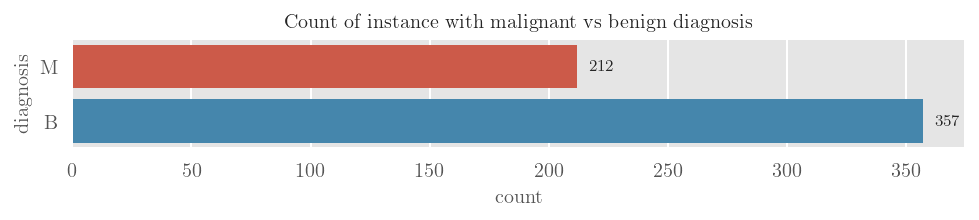

In [8]:
plt.figure(figsize=(8,1))

# Bar plot
sns.countplot( y='diagnosis', data=data)

# offset from edge of bar
offset = 5

# annotate count
for i, count in enumerate(data.diagnosis.value_counts(sort=False)):
    plt.text(x=count+offset, y=i, s=count, va='center', fontsize=8)

plt.xlabel("count", size=10)
plt.ylabel("diagnosis", size=10);
plt.title('Count of instance with malignant vs benign diagnosis', size=10);


We observe that the dataset consists of more benign tumour diagnosis than malignant tumour. Any classifier must do better than the baseline prediction accuracy of $\frac{357}{579} = 63.4\% $

Let's label encode the categoricals before further analysis 

In [9]:
data.diagnosis = data.diagnosis.map({'M': 0, 'B': 1})


### Violin-plot and box-plot of features by diagnosis

Considering that we have a large number of predictors, let us first start by looking at their data distribution plots as violin-plots and box-plots.

For each of the 10 predictors there are three separate measurements: mean, se and worst. It may be more informative to compare the feature means, feature_se and feature_worst in groups. 

Observing the min and max values of the features, there is a considerable difference in the order of magnitude. To make meaningful comparisons, let us first standardize the features. 

#### Standardize data

In [10]:
X, y = data.drop(columns=['diagnosis']), data.diagnosis

scaler = StandardScaler()
array = scaler.fit_transform(X)
X_scaled = pd.DataFrame(columns=X.columns, data=array)


### Violin plot of `_mean` features

To compare the `_mean` features, we need to transform the **wide-form** data to **long-form**. We melt the dataframe and store the column names in `means` and column values in `distribution`

In [11]:
data_mean = X_scaled.iloc[:, :10]
data_mean['diagnosis'] = y

data_mean = pd.melt(data_mean, id_vars=['diagnosis'], var_name='mean', value_name="distribution")

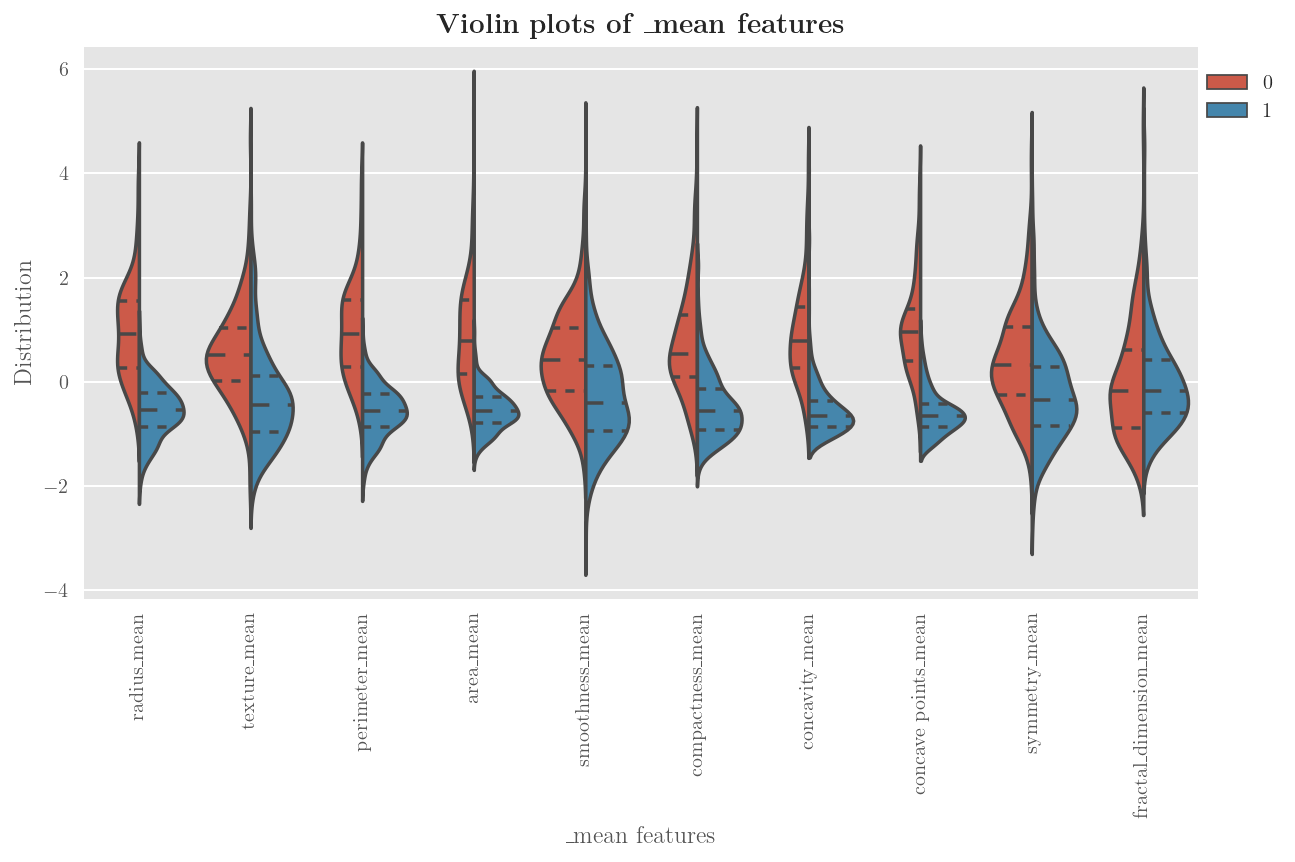

In [12]:
plt.figure(figsize=(10,5))

sns.violinplot(y='distribution', 
               x='mean', 
               hue='diagnosis',
               data=data_mean, 
               split=True,
               inner='quartile',
              )

plt.legend(loc=(1,0.85))
plt.ylabel("Distribution", 
            size=12,
          )
plt.xlabel("_mean features", 
            size=12,
          )
plt.title(r'\textbf{Violin plots of _mean features}', 
          size=14,
         )
plt.xticks(rotation=90);

### Box plot of `_mean` features

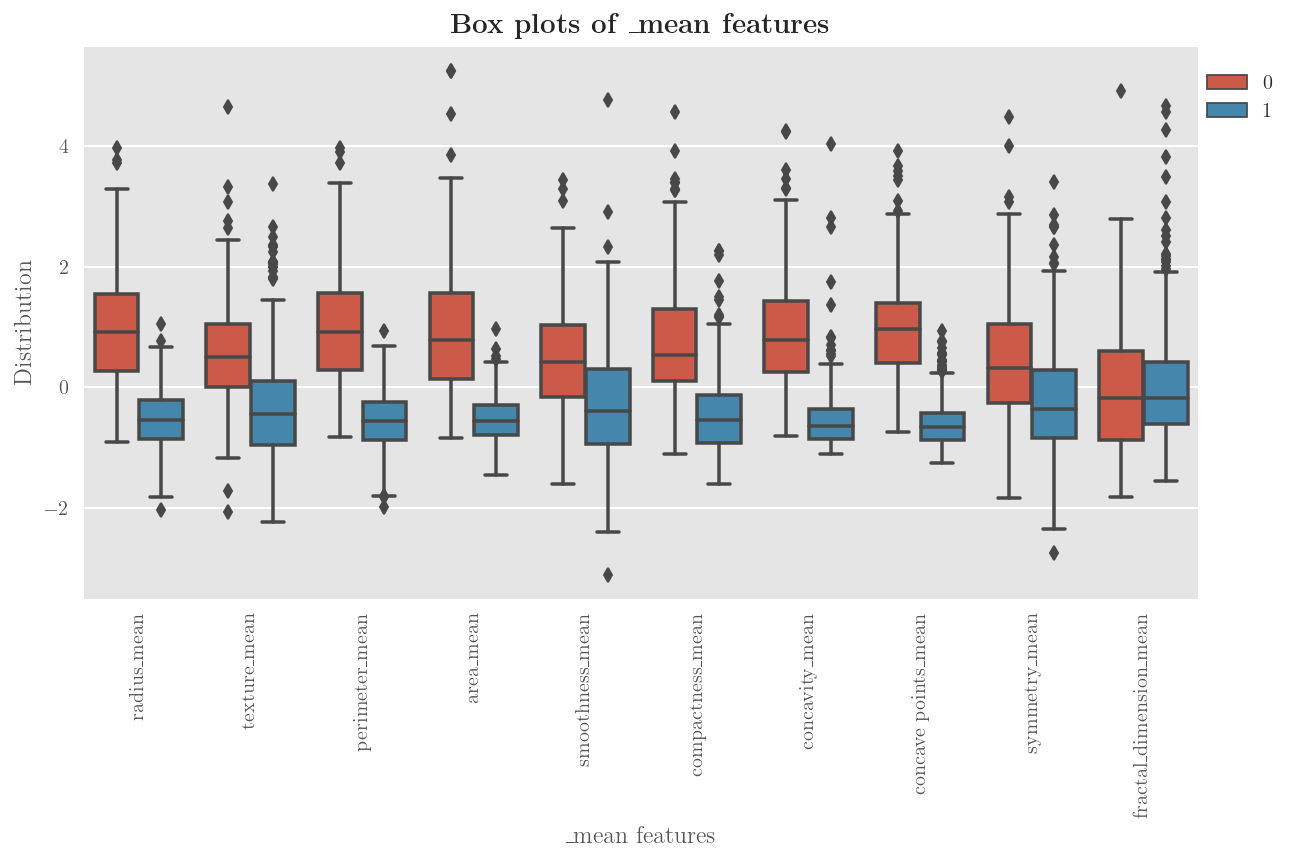

In [13]:
plt.figure(figsize=(10,5))

sns.boxplot(y='distribution', 
               x='mean', 
               hue='diagnosis',
               data=data_mean,
              )

plt.legend(loc=(1,0.85))
plt.ylabel("Distribution", 
            size=12,
          )
plt.xlabel("_mean features", 
            size=12,
          )
plt.title(r'\textbf{Box plots of _mean features}', 
          size=14,
         )
plt.xticks(rotation=90);

In [14]:
data_se = X_scaled.iloc[:, 10:20]
data_se['diagnosis'] = y

data_se = pd.melt(data_se, id_vars=['diagnosis'], var_name='se', value_name="distribution")

### Violin plot of `_se` features

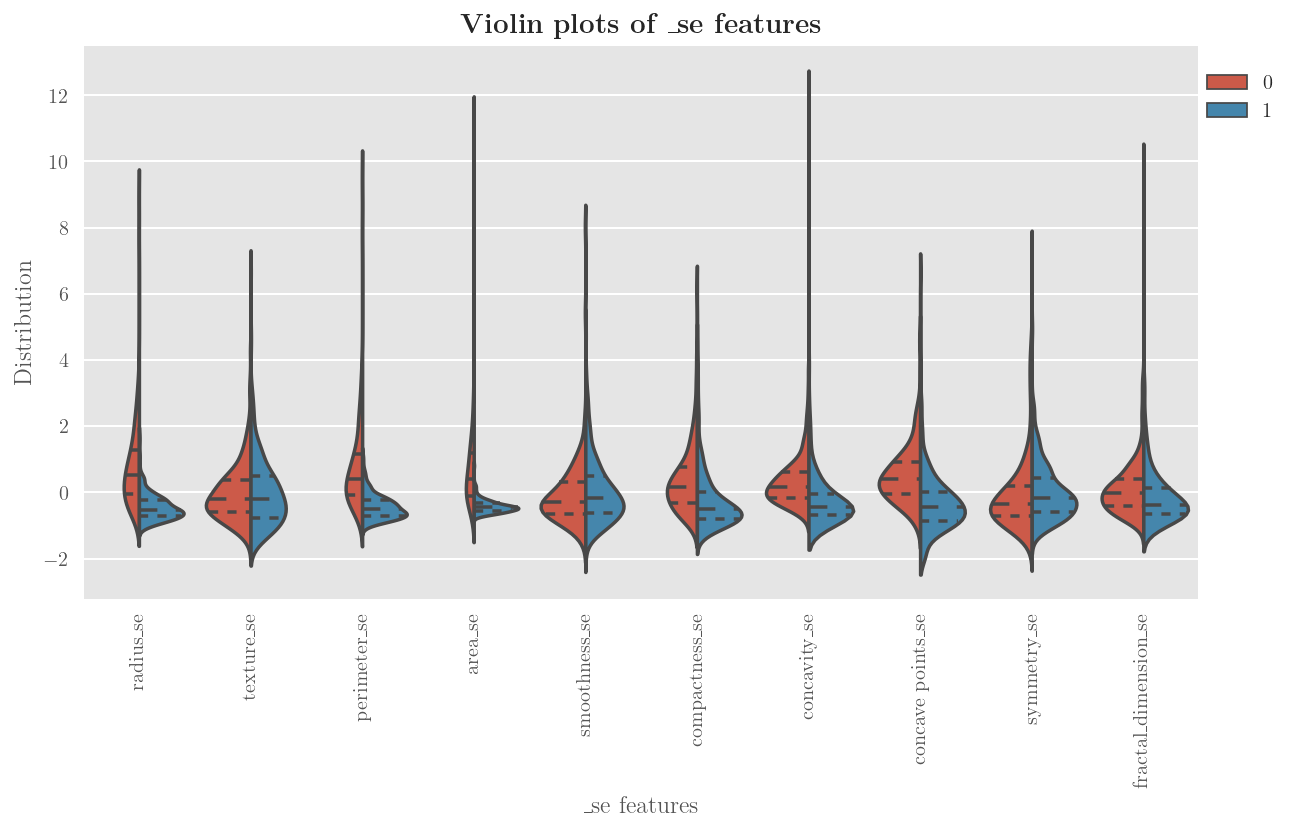

In [15]:
plt.figure(figsize=(10,5))

sns.violinplot(y='distribution', 
               x='se', 
               hue='diagnosis',
               data=data_se, 
               split=True,
               inner='quartile'
              )

plt.legend(loc=(1,0.85))
plt.ylabel("Distribution", 
            size=12,
          )
plt.xlabel("_se features", 
            size=12,
          )
plt.title(r'\textbf{Violin plots of _se features}', 
          size=14,
         )
plt.xticks(rotation=90);

### Box plot of `_se` features

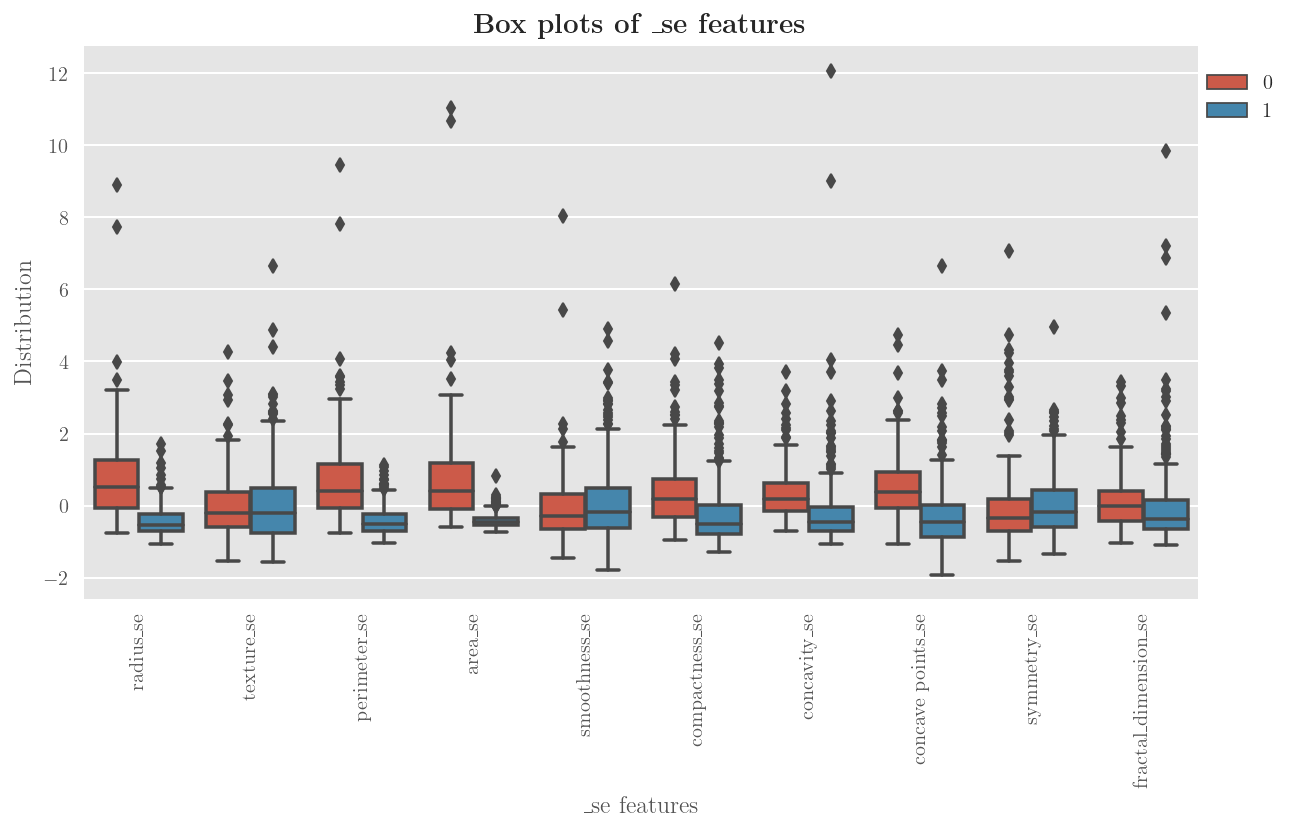

In [16]:
plt.figure(figsize=(10,5))

sns.boxplot(y='distribution', 
               x='se', 
               hue='diagnosis',
               data=data_se, 
              )

plt.legend(loc=(1,0.85))
plt.ylabel("Distribution", 
            size=12,
          )
plt.xlabel("_se features", 
            size=12,
          )
plt.title(r'\textbf{Box plots of _se features}', 
          size=14,
         )
plt.xticks(rotation=90);

In [17]:
data_worst = X_scaled.iloc[:, 20:]
data_worst['diagnosis'] = y

data_worst = pd.melt(data_worst, id_vars=['diagnosis'], var_name='worst', value_name="distribution")

### Violin plot of `_worst` features

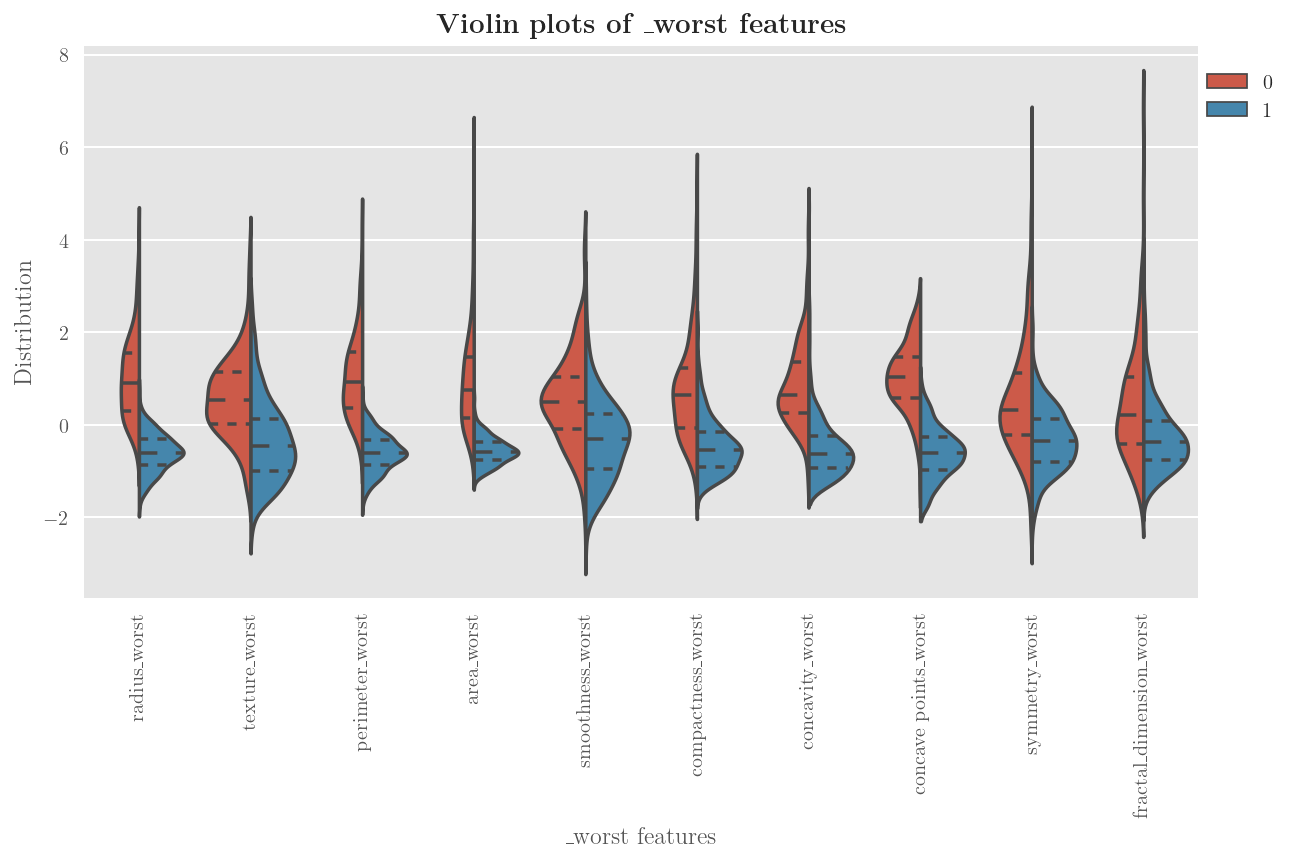

In [18]:
plt.figure(figsize=(10,5))

sns.violinplot(y='distribution', 
               x='worst', 
               hue='diagnosis',
               data=data_worst, 
               split=True,
               inner='quartile'
              )

plt.legend(loc=(1,0.85))
plt.ylabel("Distribution", 
            size=12,
          )
plt.xlabel("_worst features", 
            size=12,
          )
plt.title(r'\textbf{Violin plots of _worst features}', 
          size=14,
         )
plt.xticks(rotation=90);

### Box plot of `_worst` features

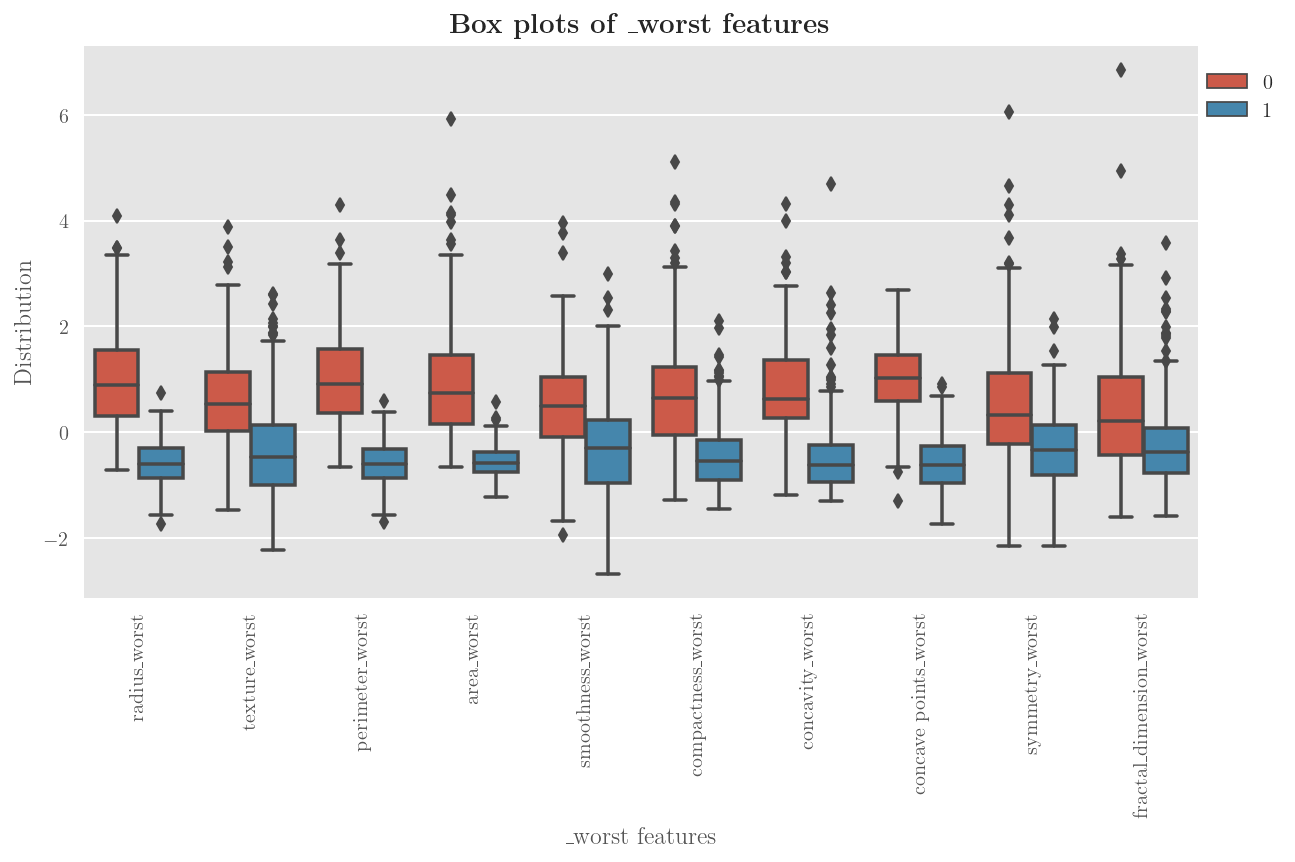

In [19]:
plt.figure(figsize=(10,5))

sns.boxplot(y='distribution', 
               x='worst', 
               hue='diagnosis',
               data=data_worst, 
              )

plt.legend(loc=(1,0.85))
plt.ylabel("Distribution", 
            size=12,
          )
plt.xlabel("_worst features", 
            size=12,
          )
plt.title(r'\textbf{Box plots of _worst features}', 
          size=14,
         )
plt.xticks(rotation=90);

We observe that on average the malignant tumours are larger in size, more textures, more unsymmetrical.. etc i.e. In almost all features, the distribution of the diagnoses is well separated. 

In [20]:
# Pair plots

## Correlation

Let us now study the correlation between features. Recall that it is generally good indication to observe strong correlation between the target variable and the predictions. However, linear models are adversely affected if there is a present of strong correlation among the predictors, i.e. multicollinearity.

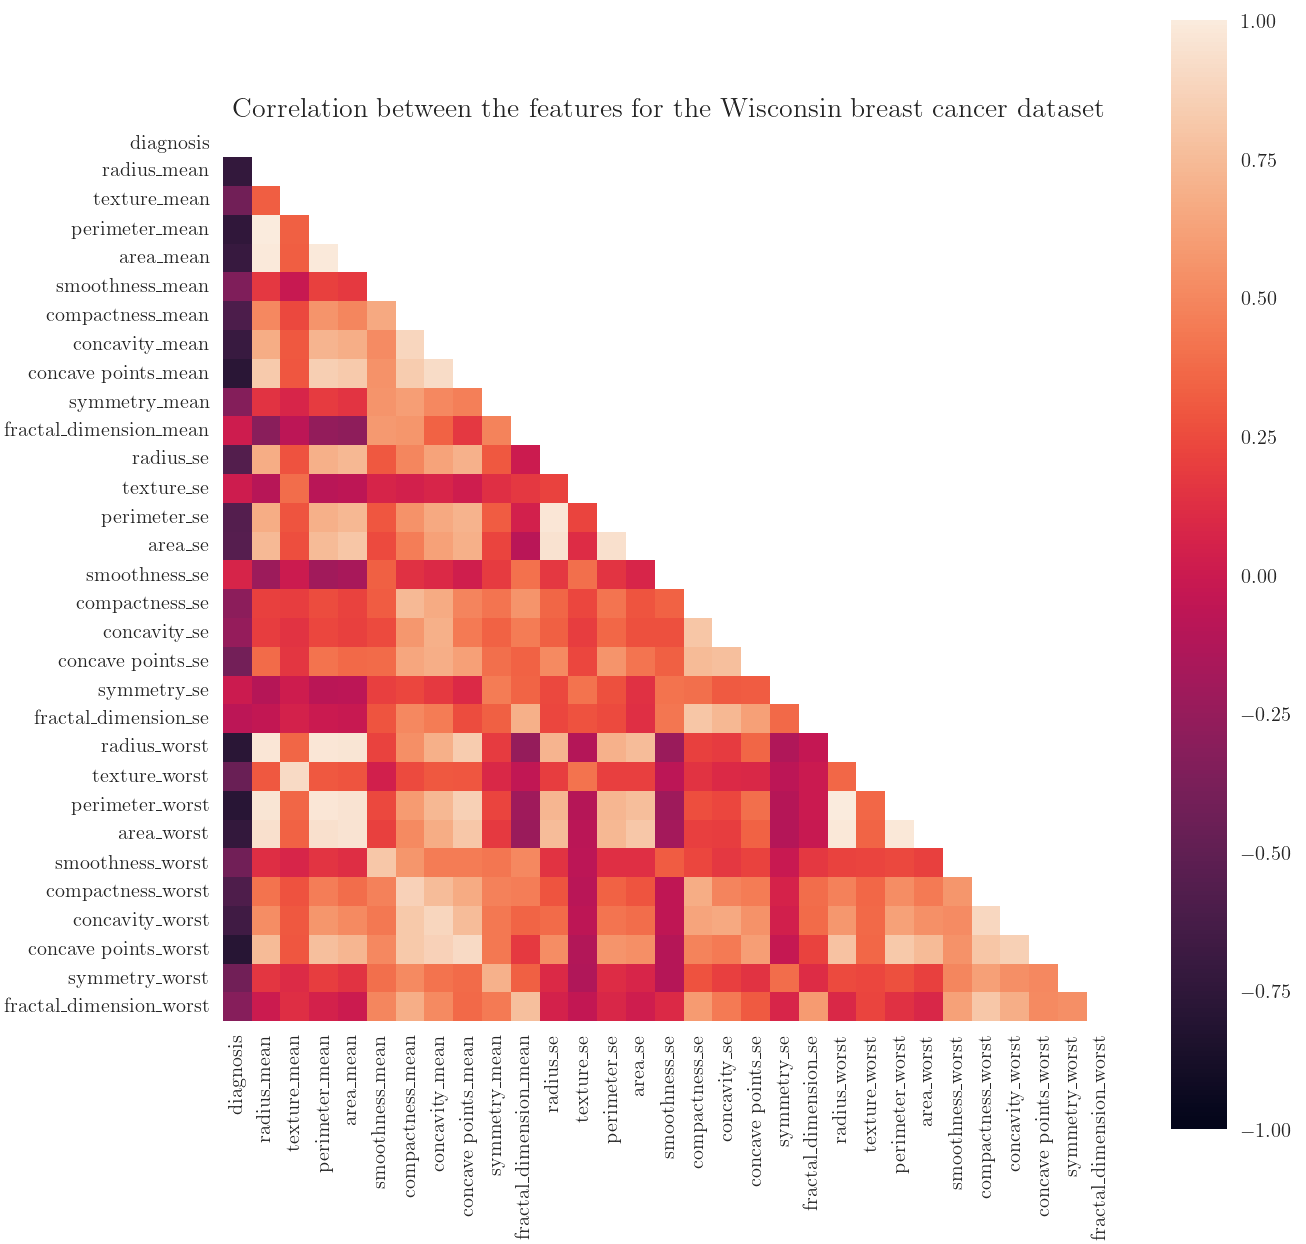

In [21]:
corr = data.corr()
import numpy as np
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, square=True)
plt.title('Correlation between the features for the Wisconsin breast cancer dataset');

We see that there are a few features that are highly correlated. Lets remove those features that have a correlation higher than 0.85

In [22]:
pd.options.display.float_format = '${:,.2f}'.format
format_vertical_headers(corr)\
.format("{:.2f}")\
.applymap(lambda x: 'background-color : yellow' if abs(x)>=0.85 else 'background-color : white')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.00,-0.73,-0.42,-0.74,-0.71,-0.36,-0.60,-0.70,-0.78,-0.33,0.01,-0.57,0.01,-0.56,-0.55,0.07,-0.29,-0.25,-0.41,0.01,-0.08,-0.78,-0.46,-0.78,-0.73,-0.42,-0.59,-0.66,-0.79,-0.42,-0.32
radius_mean,-0.73,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,0.68,-0.10,0.67,0.74,-0.22,0.21,0.19,0.38,-0.10,-0.04,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture_mean,-0.42,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,0.28,0.39,0.28,0.26,0.01,0.19,0.14,0.16,0.01,0.05,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter_mean,-0.74,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,0.69,-0.09,0.69,0.74,-0.20,0.25,0.23,0.41,-0.08,-0.01,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area_mean,-0.71,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,0.73,-0.07,0.73,0.80,-0.17,0.21,0.21,0.37,-0.07,-0.02,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness_mean,-0.36,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,0.30,0.07,0.30,0.25,0.33,0.32,0.25,0.38,0.20,0.28,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness_mean,-0.60,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,0.50,0.05,0.55,0.46,0.14,0.74,0.57,0.64,0.23,0.51,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,-0.70,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,0.63,0.08,0.66,0.62,0.10,0.67,0.69,0.68,0.18,0.45,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave points_mean,-0.78,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,0.70,0.02,0.71,0.69,0.03,0.49,0.44,0.62,0.10,0.26,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry_mean,-0.33,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,0.30,0.13,0.31,0.22,0.19,0.42,0.34,0.39,0.45,0.33,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44


## Data preparation for modelling

In [23]:
# drop highly correlated redundant columns
correlated_cols_to_drop = [ 'perimeter_se', 
                           'area_se',
                           'radius_worst', 
                           'perimeter_worst', 
                           'area_worst', 
                           'compactness_worst', 
                           'concavity_worst', 
                           'concave points_worst', 
]
# apply standard scaler
data.drop(columns=correlated_cols_to_drop, inplace=True)
X, y = data.drop(columns=['diagnosis']), data.diagnosis
scaler = StandardScaler()
array = scaler.fit_transform(X)
X_scaled = pd.DataFrame(columns=X.columns, data=array)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

## Dummy Classifier

In order to establish a baseline performance, we will first start with the "0-R", classifier, i.e. a classifier that ignores all the predictors, and simply picks the most occurring class in the target variable.

In [24]:
# Dummy classifier
classifier = DummyClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
confusion_matrix_ = confusion_matrix(y_test, y_pred)
print(confusion_matrix_)
print(classification_report(y_test, y_pred))

[[ 0 53]
 [ 0 90]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.63      1.00      0.77        90

    accuracy                           0.63       143
   macro avg       0.31      0.50      0.39       143
weighted avg       0.40      0.63      0.49       143



In what follows, therefore, let us pursue a classifier that improves upon these results significantly.

## Logistic regression

### Univariate Logistic Regression

Recalling our observation that features like the `area_mean` appeared to provide a visual separation between the target class in the boxplots, let us first begin with a simple univariate logistic classifier.

In [25]:
X, y = X_scaled[['area_mean']], data.diagnosis
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

classifier =  LogisticRegression(solver='newton-cg')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [26]:
confusion_matrix_ = confusion_matrix(y_test, y_pred)
print(confusion_matrix_)
print(classification_report(y_test, y_pred))

[[44  9]
 [ 5 85]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86        53
           1       0.90      0.94      0.92        90

    accuracy                           0.90       143
   macro avg       0.90      0.89      0.89       143
weighted avg       0.90      0.90      0.90       143



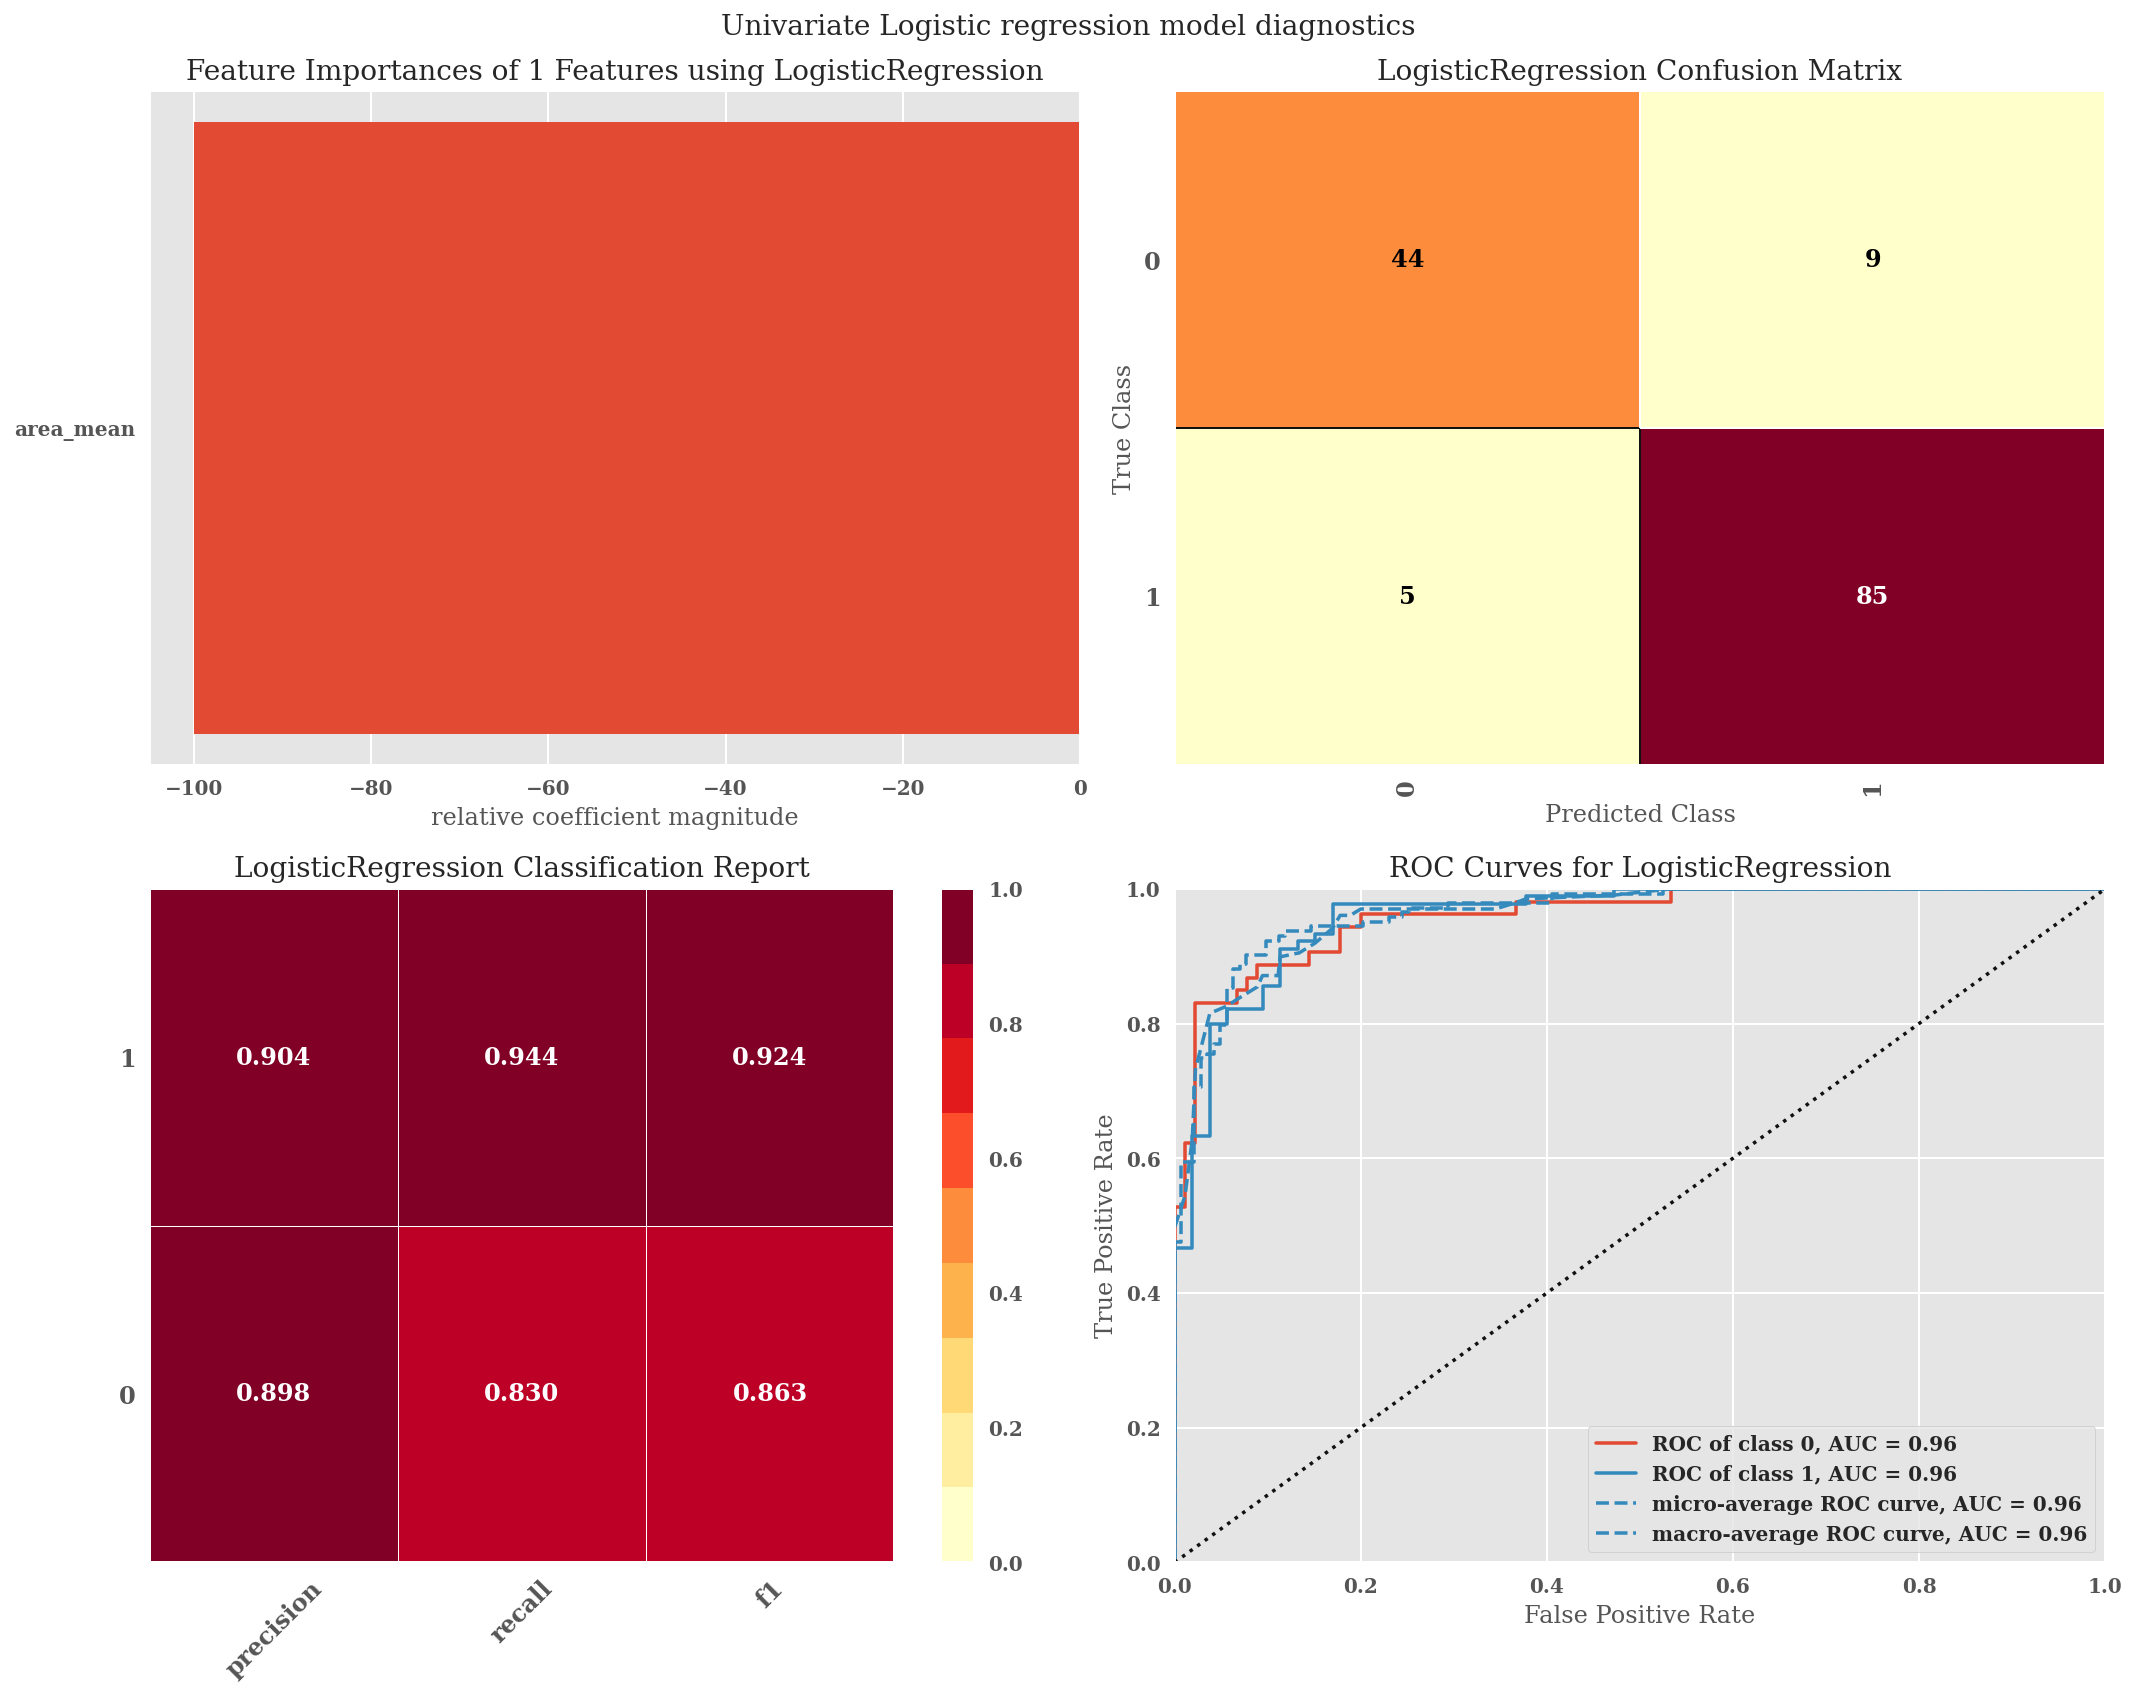

In [27]:
plt.rcParams[ 'figure.figsize' ] = '15,12'             

rc('text', usetex=False)
fig, axes = plt.subplots(2, 2)

model = classifier
visualgrid = [
    FeatureImportances(model, ax=axes[0][0]),
    ConfusionMatrix(model, ax=axes[0][1], pos_label='M'),
    ClassificationReport(model, ax=axes[1][0], pos_label='M'),
    ROCAUC(model, classes = ['0', '1'], ax=axes[1][1], pos_label='M'),
]

for viz in visualgrid:
    viz.fit(X_train, y_train,)
    viz.score(X_test, y_test,)
    viz.finalize()

plt.suptitle(r'Univariate Logistic regression model diagnostics');
plt.tight_layout();

We observe that we get a good **precision** with a univariate classification. However the **recall** of the malignant diagnosis is much more important to us since diagnoses with fewer false negatives is required. The recall of the malignant diagnosis is 0.830. Let's see if this can be improved with multivariate logistic regression

### Multivariate Logistic regression

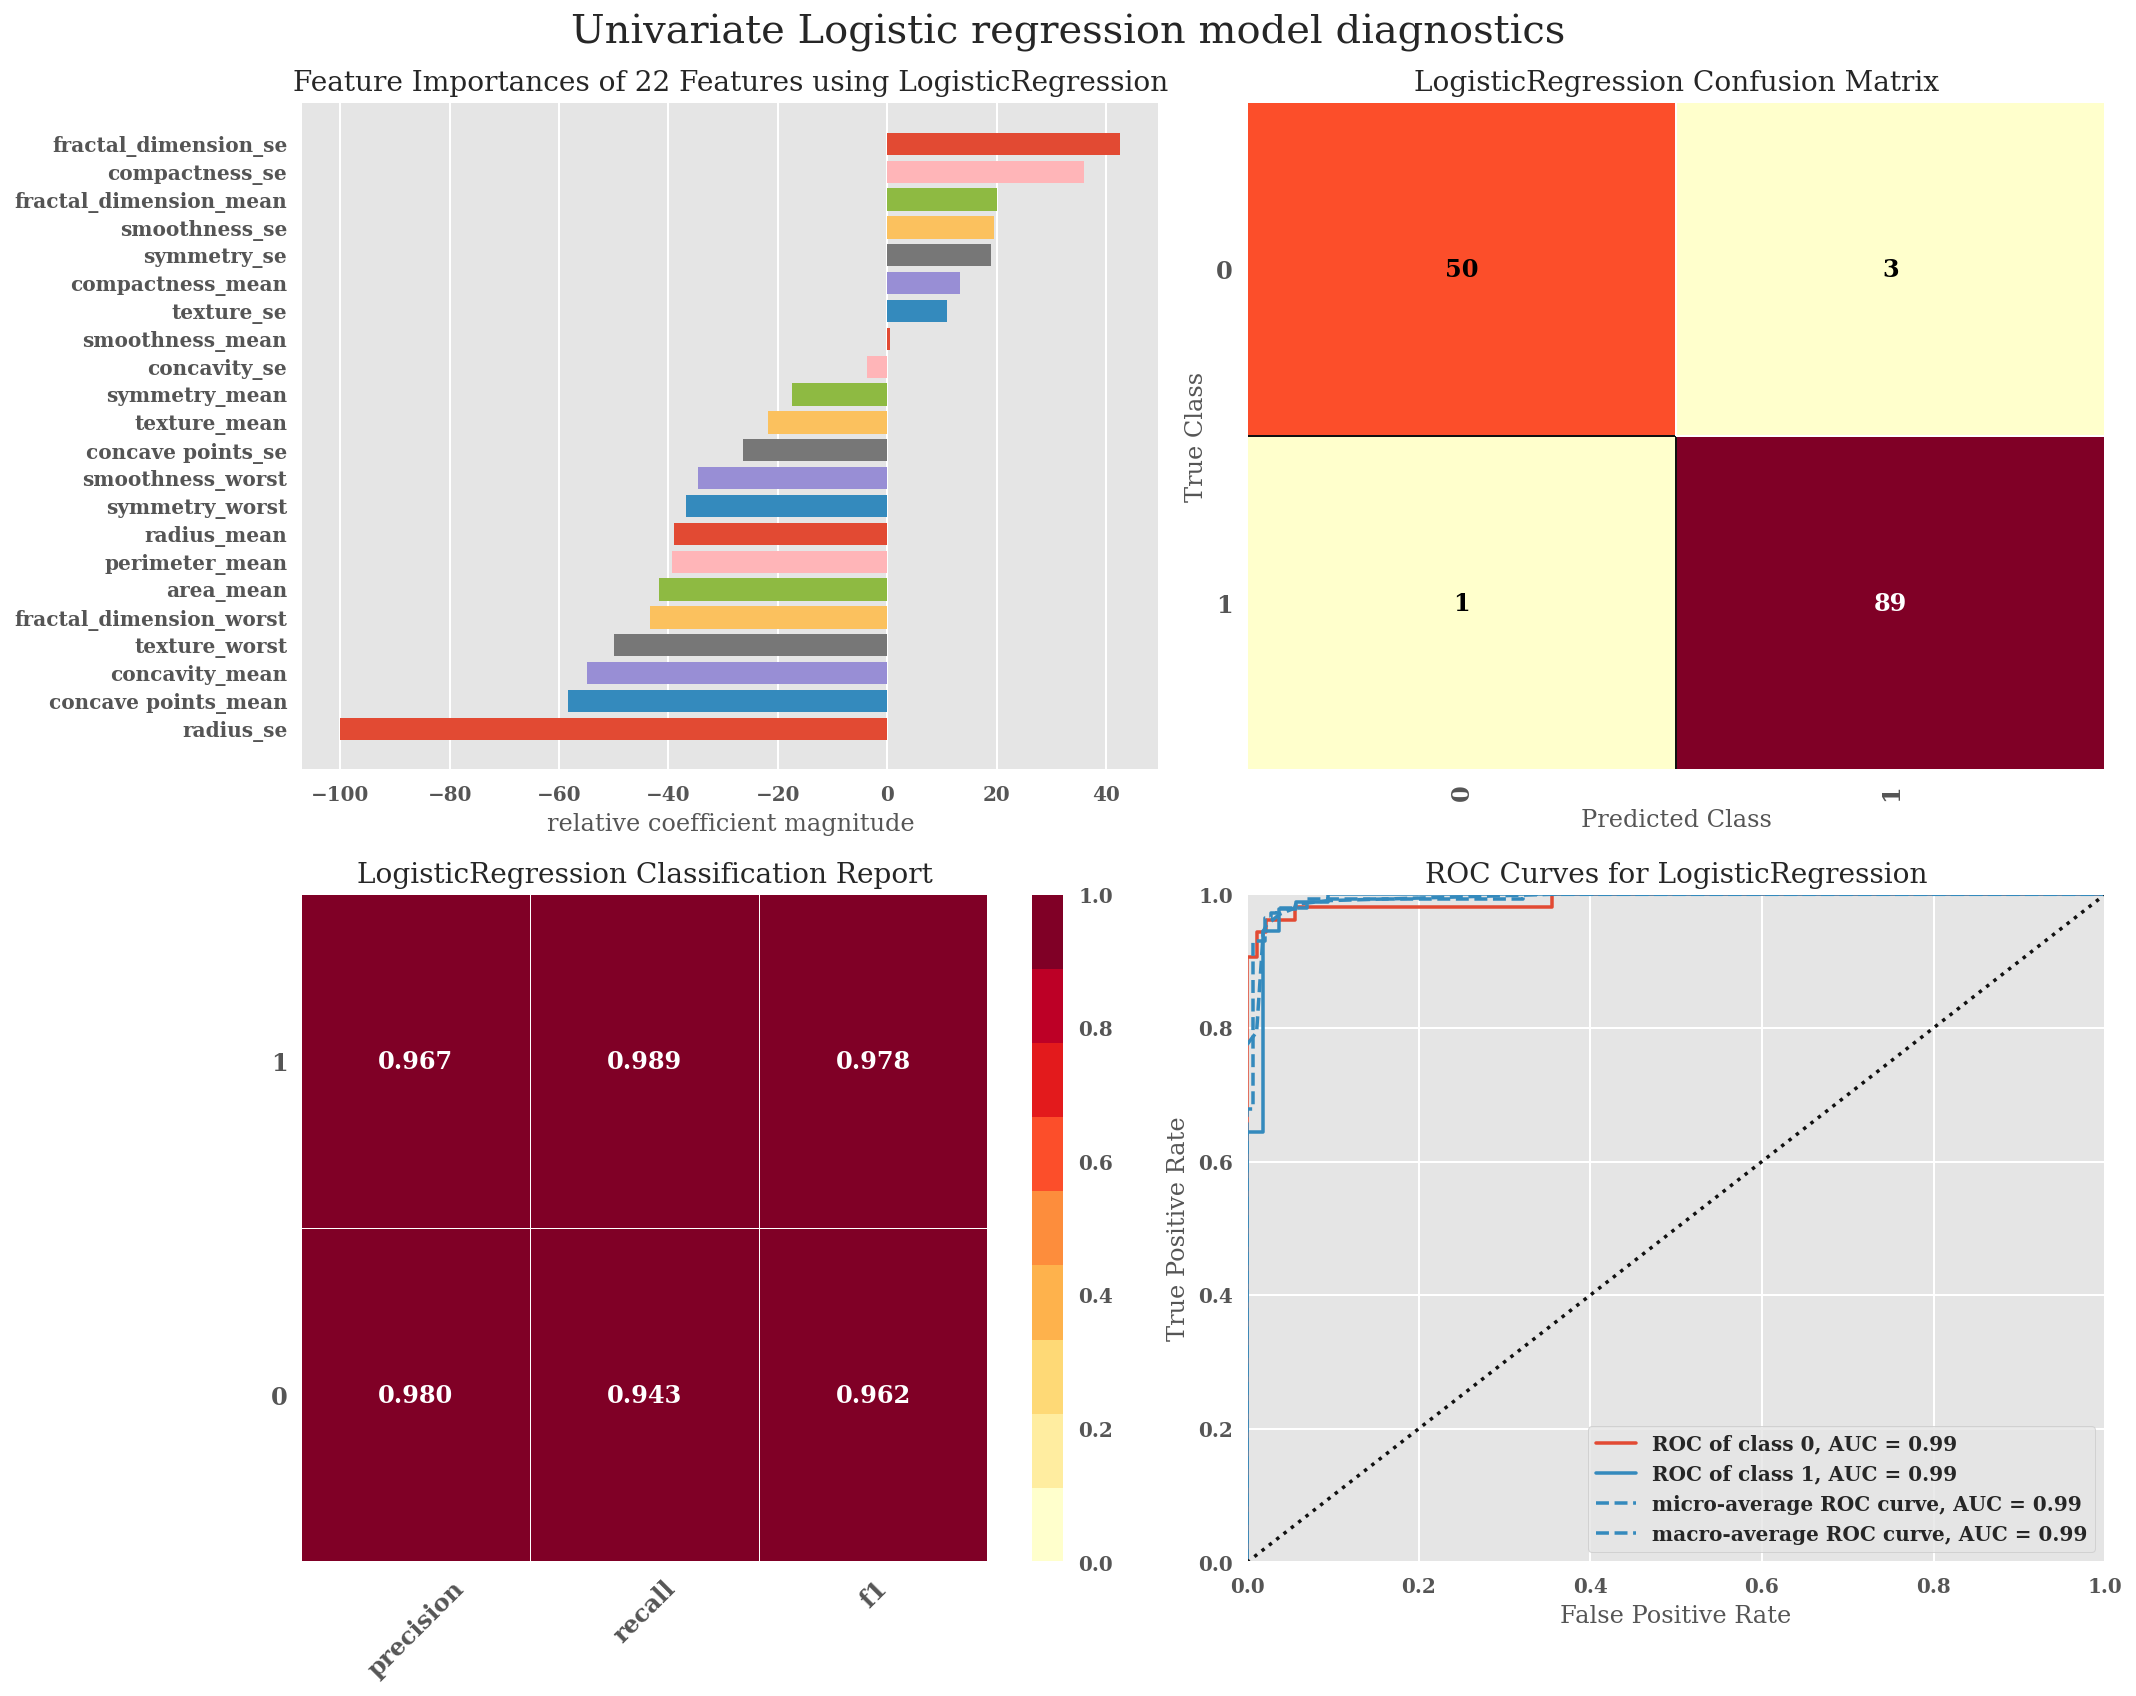

In [28]:
X, y = X_scaled, data.diagnosis
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

classifier =  LogisticRegression(solver='newton-cg')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

plt.rcParams[ 'figure.figsize' ] = '15,12'    
rc('text', usetex=False)
fig, axes = plt.subplots(2, 2)

model = classifier
visualgrid = [
    FeatureImportances(model, ax=axes[0][0]),
    ConfusionMatrix(model, ax=axes[0][1], pos_label='M'),
    ClassificationReport(model, ax=axes[1][0], pos_label='M'),
    ROCAUC(model, classes = ['0', '1'], ax=axes[1][1], pos_label='M'),
]

for viz in visualgrid:
    viz.fit(X_train, y_train,)
    viz.score(X_test, y_test,)
    viz.finalize()

plt.suptitle(r'Univariate Logistic regression model diagnostics', fontsize=20);
plt.tight_layout();

## K - Nearest Neighbours

### With a single feature

In [29]:
X, y = X_scaled[['area_mean']], data.diagnosis
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

confusion_matrix_ = confusion_matrix(y_test, y_pred)
print(confusion_matrix_)
print(classification_report(y_test, y_pred))


[[45  8]
 [ 5 85]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87        53
           1       0.91      0.94      0.93        90

    accuracy                           0.91       143
   macro avg       0.91      0.90      0.90       143
weighted avg       0.91      0.91      0.91       143



### With all the features

In [30]:
X, y = X_scaled, data.diagnosis
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

confusion_matrix_ = confusion_matrix(y_test, y_pred)
print(confusion_matrix_)
print(classification_report(y_test, y_pred))

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7fd5919510>
Traceback (most recent call last):
  File "/home/asif/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/asif/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/asif/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/asif/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


[[47  6]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        53
           1       0.94      0.98      0.96        90

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143



Lets apply PCA and visualize the dataset with the first two components

## PCA

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_transformed = pca.transform(X)

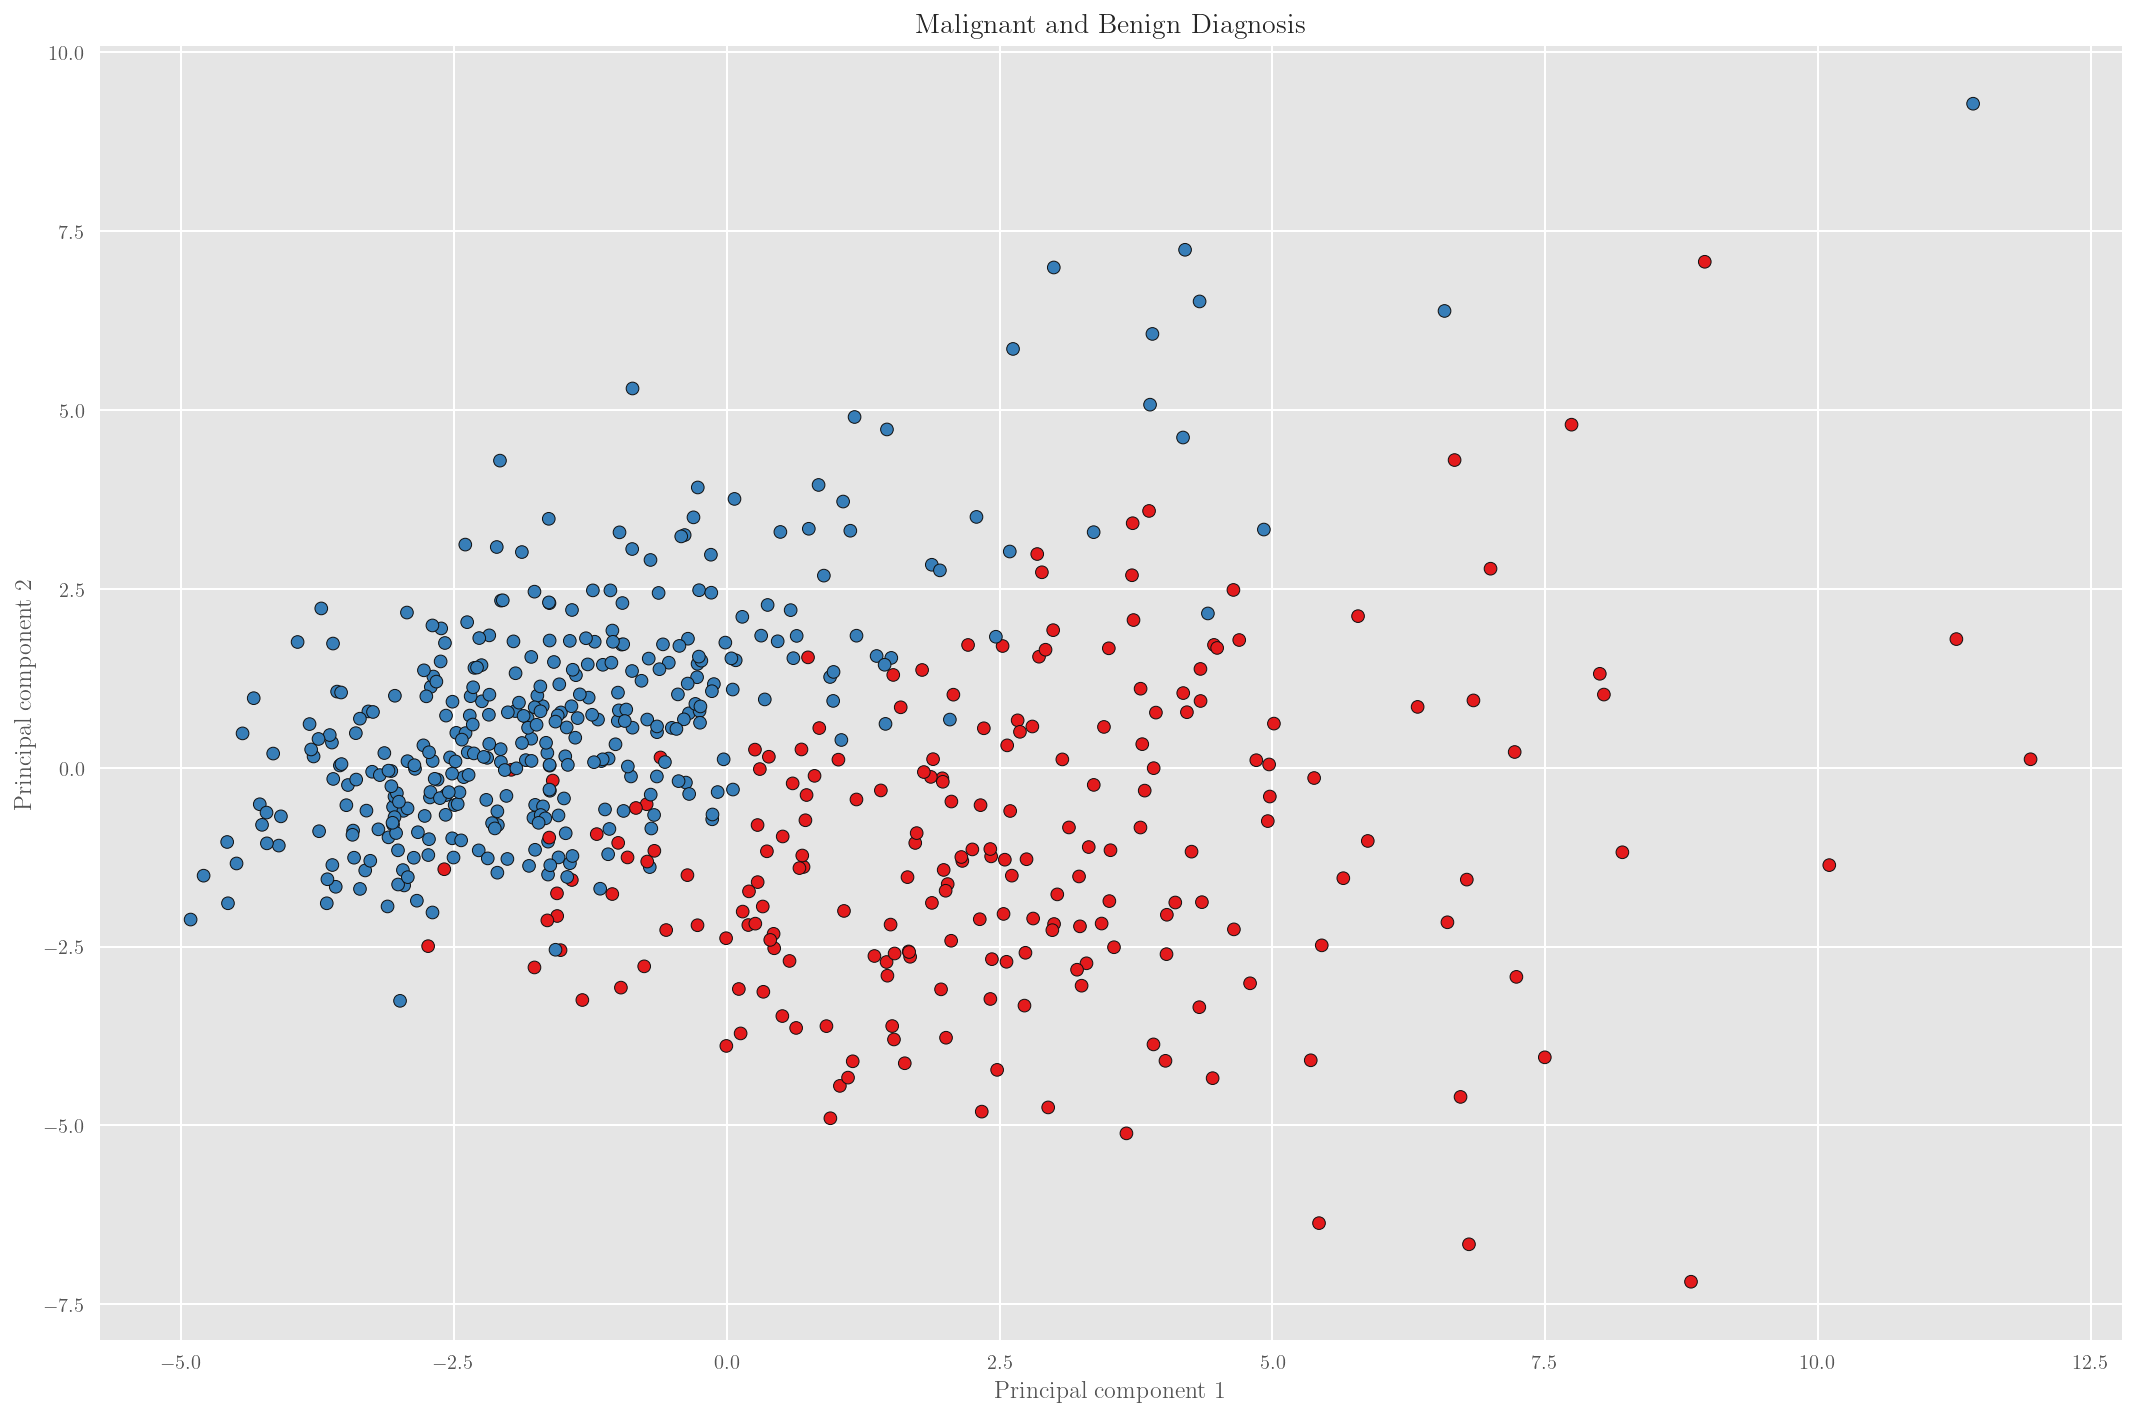

In [32]:
plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams.update(plot_style)
plt.rcParams[ 'figure.figsize' ] = '15,10' 

ax = plt.axes()
ax.scatter(
    X_transformed[:, 0],
    X_transformed[:, 1],
    color=plt.cm.Set1(y),
    edgecolor="k",
    s=40,
)

ax.set_xlabel("Principal component 1")
ax.set_ylabel("Principal component 2")
ax.set_title("Malignant and Benign Diagnosis")

plt.tight_layout();

We observe that the two classes do not overlap to a large extent. Let us apply KNN and visualize the predictions

### Uniform Weight

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        53
           1       0.95      0.97      0.96        90

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



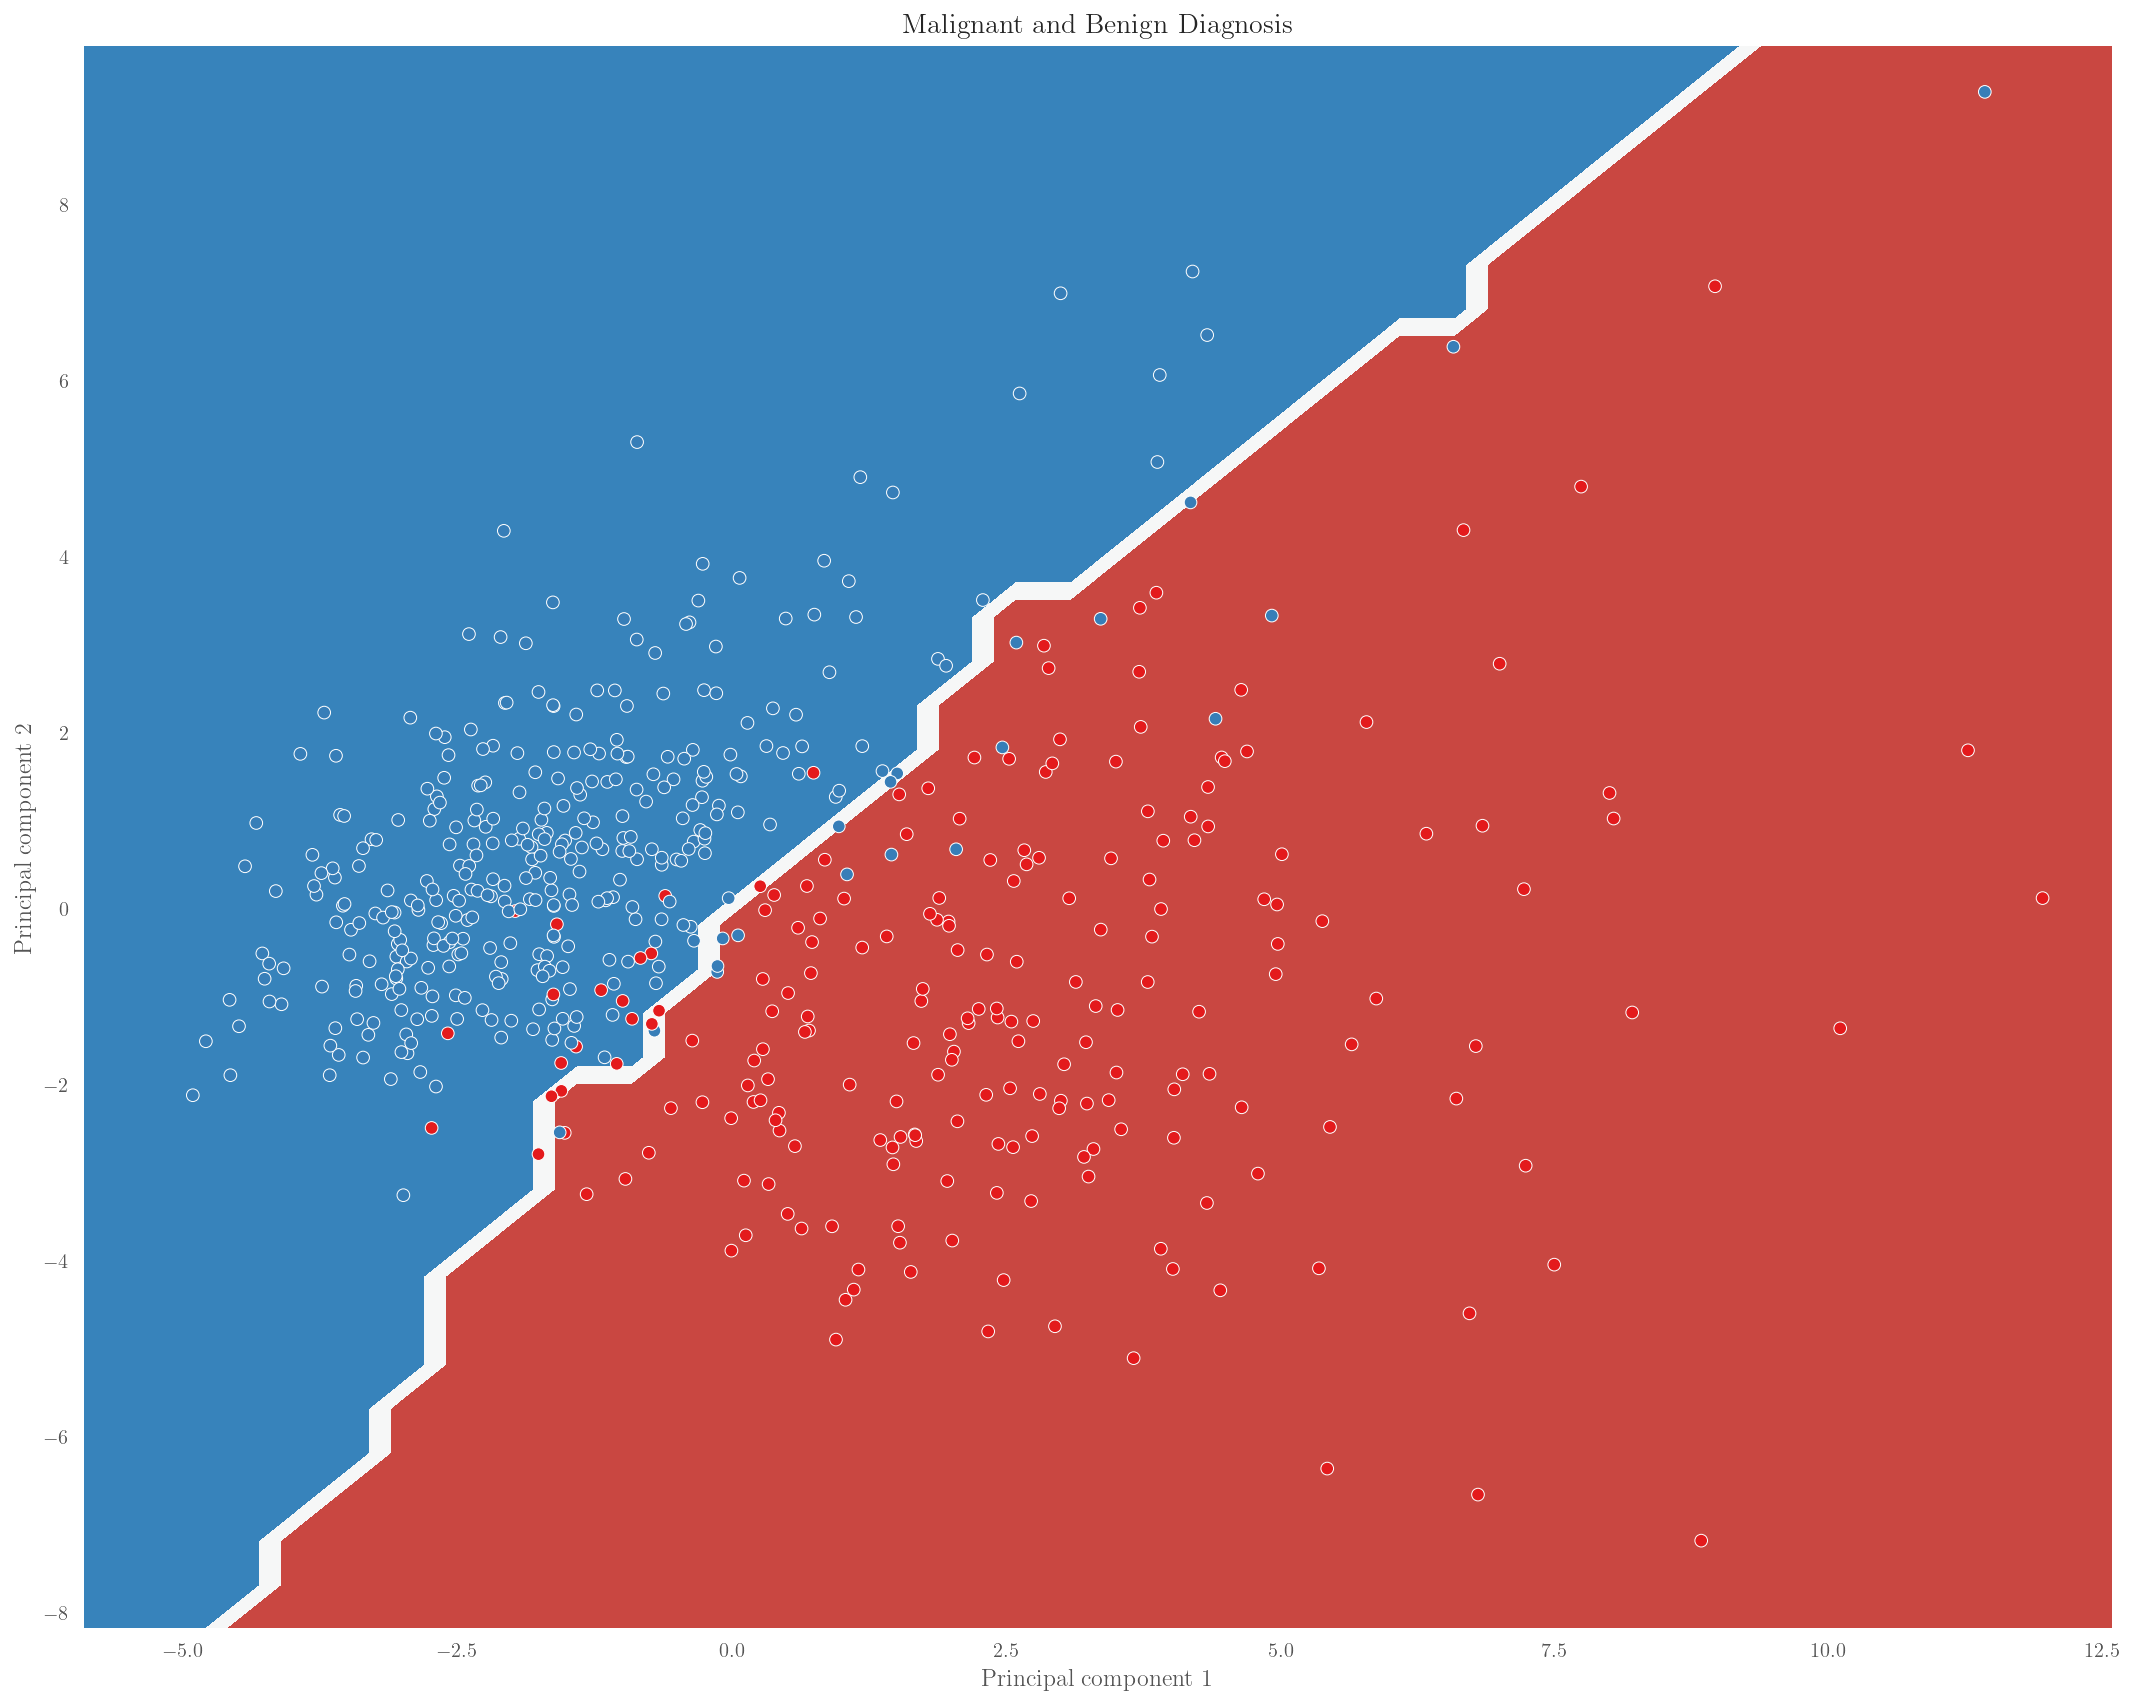

In [33]:
X, y = X_transformed, data.diagnosis
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

confusion_matrix_ = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

x1, x2 = X_transformed[:, 0], X_transformed[:, 1]

h = 0.5
x_min, x_max = x1.min() - 1, x1.max() + 1
y_min, y_max = x2.min() - 1, x2.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams.update(plot_style)
plt.rcParams[ 'figure.figsize' ] = '15,12' 

plt.contourf(xx, yy, Z, cmap='RdBu', alpha=1,levels=2, zorder=1)
plt.scatter(
    X_transformed[:, 0],
    X_transformed[:, 1],
    color=plt.cm.Set1(y),
    edgecolor="w",
    s=40,
);

plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("Malignant and Benign Diagnosis")
plt.tight_layout();

### Weight with distance

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        53
           1       0.92      0.97      0.94        90

    accuracy                           0.92       143
   macro avg       0.93      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



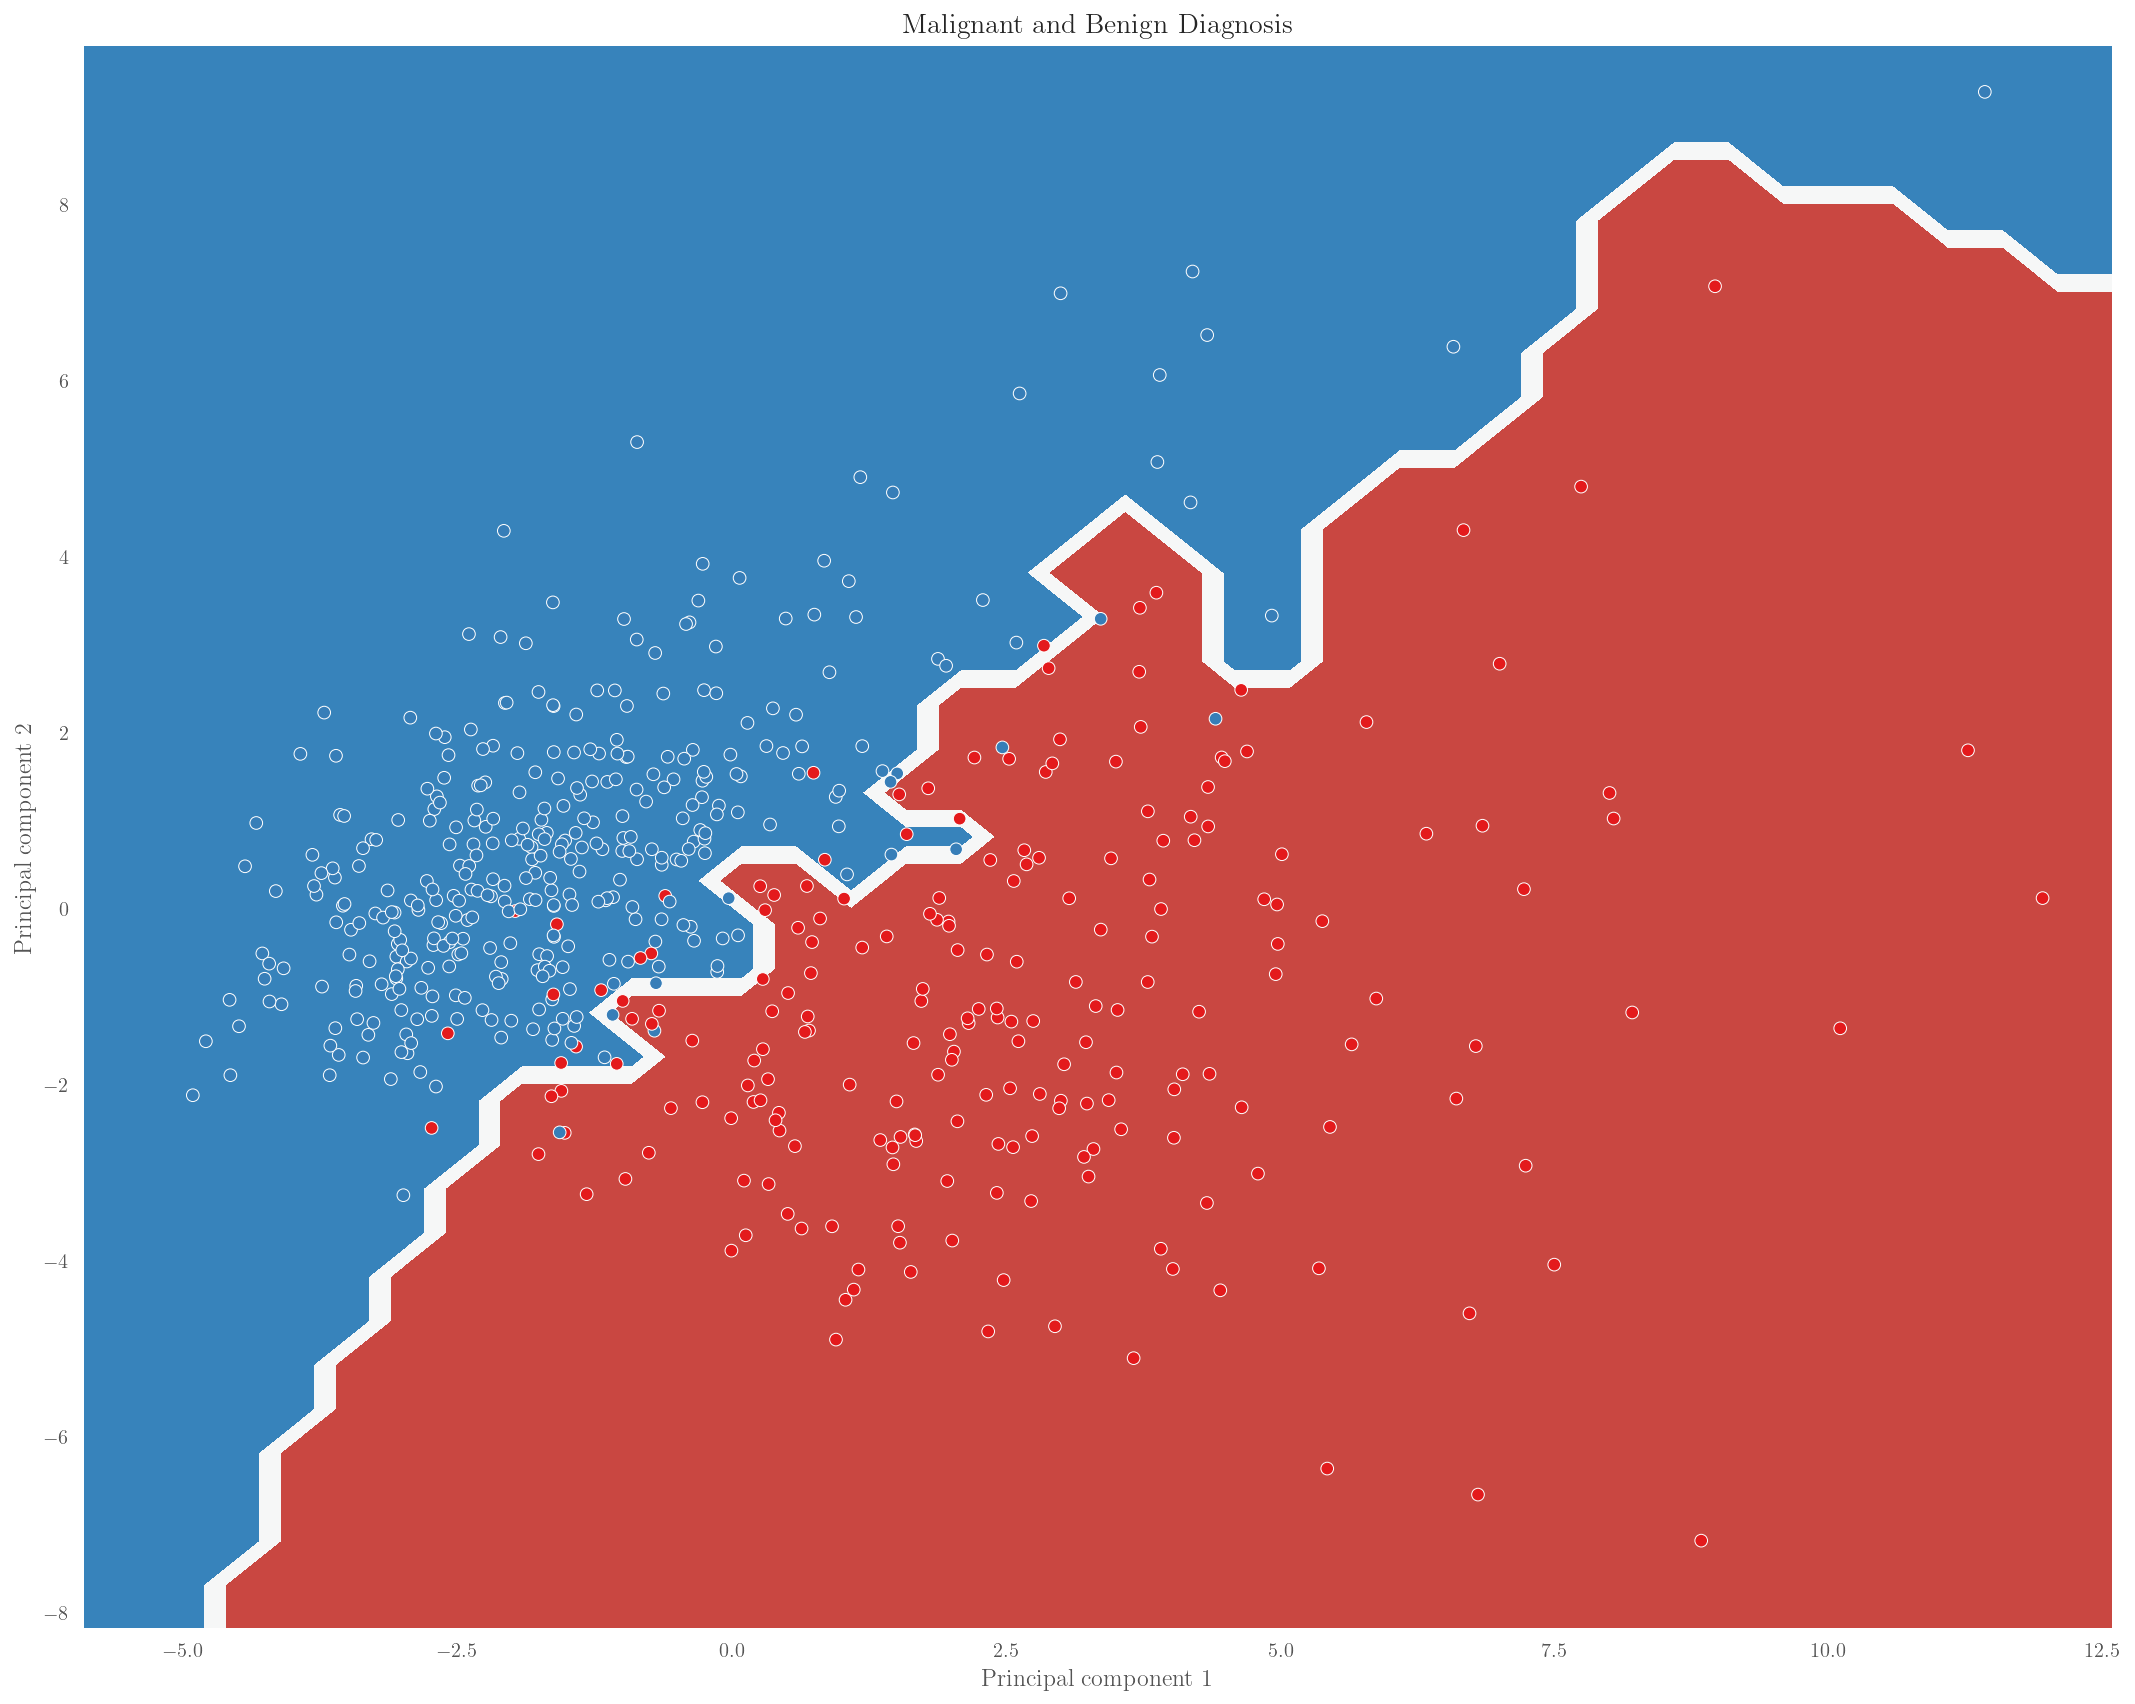

In [34]:
X, y = X_transformed, data.diagnosis
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(weights='distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

confusion_matrix_ = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

x1, x2 = X_transformed[:, 0], X_transformed[:, 1]

h = 0.5
x_min, x_max = x1.min() - 1, x1.max() + 1
y_min, y_max = x2.min() - 1, x2.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams.update(plot_style)
plt.rcParams[ 'figure.figsize' ] = '15,12' 

plt.contourf(xx, yy, Z, cmap='RdBu', alpha=1,levels=2, zorder=1)
plt.scatter(
    X_transformed[:, 0],
    X_transformed[:, 1],
    color=plt.cm.Set1(y),
    edgecolor="w",
    s=40,
);

plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("Malignant and Benign Diagnosis")
plt.tight_layout();

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        53
           1       0.95      0.97      0.96        90

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



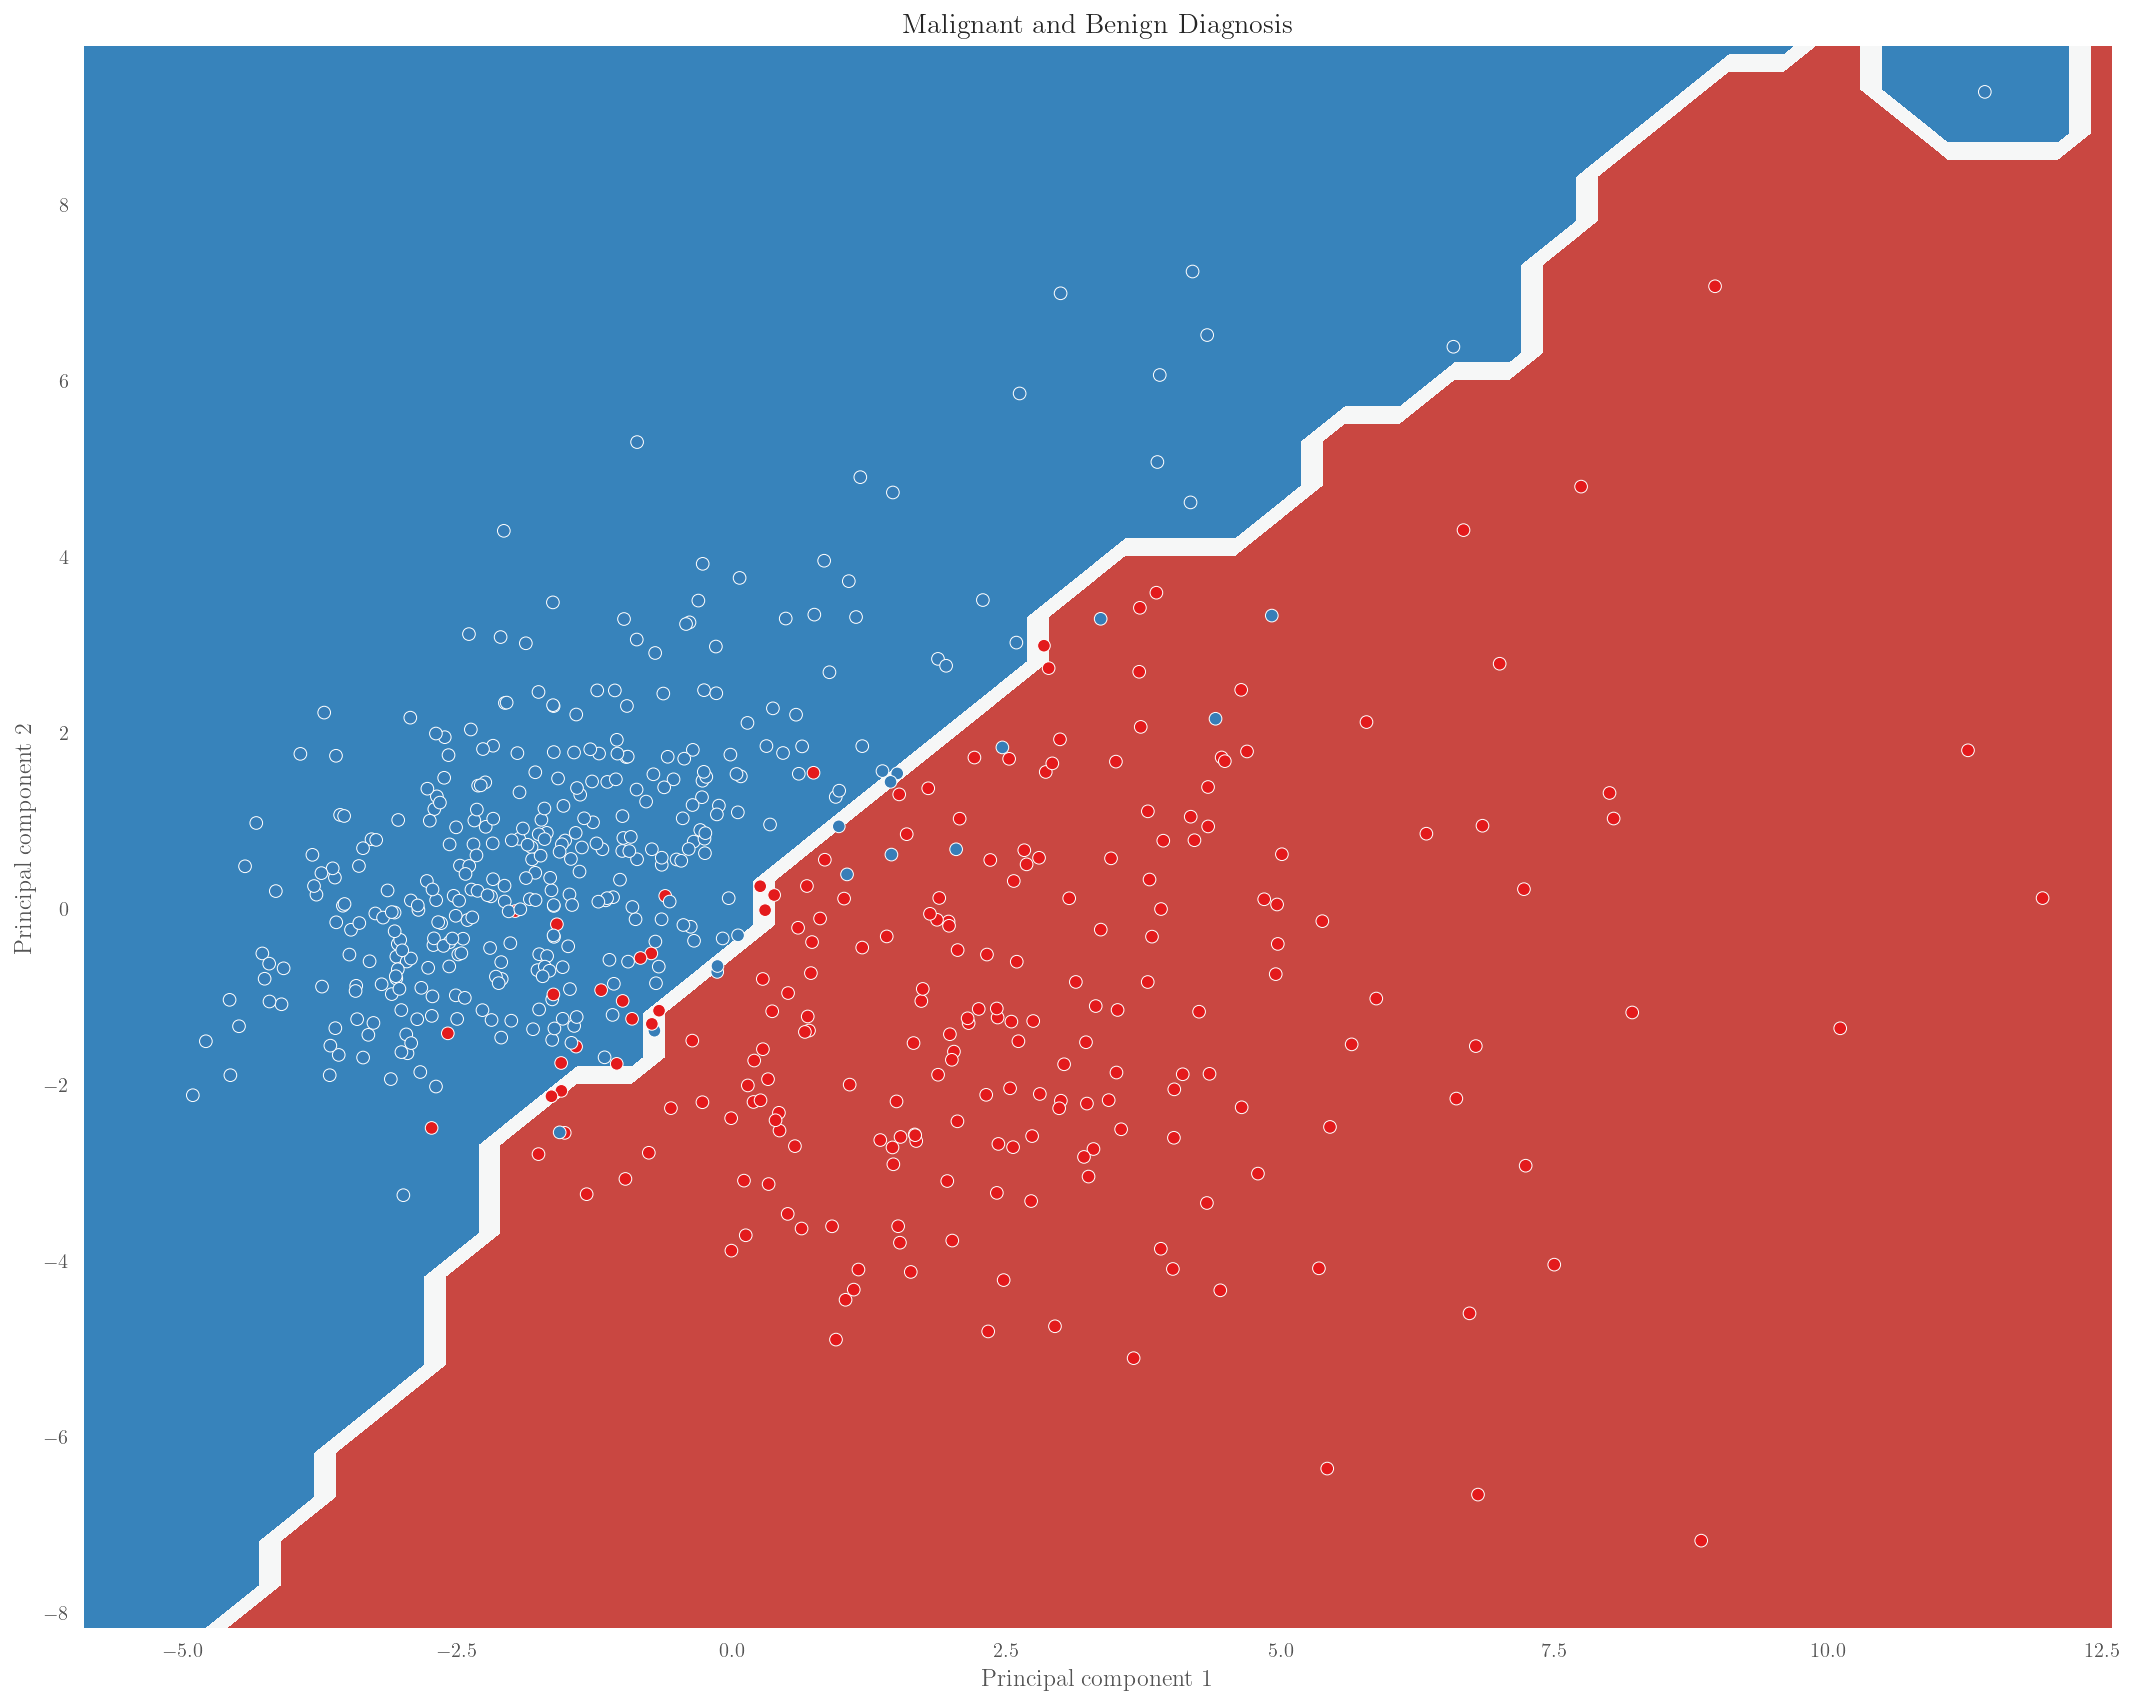

In [35]:
X, y = X_transformed, data.diagnosis
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25, weights='distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

confusion_matrix_ = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

x1, x2 = X_transformed[:, 0], X_transformed[:, 1]

h = 0.5
x_min, x_max = x1.min() - 1, x1.max() + 1
y_min, y_max = x2.min() - 1, x2.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams.update(plot_style)
plt.rcParams[ 'figure.figsize' ] = '15,12' 

plt.contourf(xx, yy, Z, cmap='RdBu', alpha=1,levels=2, zorder=1)
plt.scatter(
    X_transformed[:, 0],
    X_transformed[:, 1],
    color=plt.cm.Set1(y),
    edgecolor="w",
    s=40,
);

plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("Malignant and Benign Diagnosis")
plt.tight_layout();